In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
#import contextily as ctx
import matplotlib as mpl
#import mapclassify
import pyproj

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
#import seaborn as sns

In [7]:

import statsmodels.api as sm
from scipy.stats import shapiro

In [25]:
pip install spreg


  Using cached spreg-1.8.3-py3-none-any.whl.metadata (1.7 kB)
  Using cached libpysal-4.13.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.7-py3-none-any.whl.metadata (4.6 kB)
Using cached spreg-1.8.3-py3-none-any.whl (389 kB)
Using cached libpysal-4.13.0-py3-none-any.whl (2.8 MB)
Using cached beautifulsoup4-4.13.4-py3-none-any.whl (187 kB)
Using cached soupsieve-2.7-py3-none-any.whl (36 kB)

   -------------------- ------------------- 2/4 [libpysal]
   -------------------- ------------------- 2/4 [libpysal]
   -------------------- ------------------- 2/4 [libpysal]
   -------------------- ------------------- 2/4 [libpysal]
   -------------------- ------------------- 2/4 [libpysal]
   ------------------------------ --------- 3/4 [spreg]
   ------------------------------ --------- 3/4 [spreg]
   ------------------------------ --------- 3/4 [spreg]
   ------------------------------ --------- 3/4 [spre

In [26]:
from spreg import ML_Lag, ML_Error


In [29]:
pm_25=pd.read_csv(r"C:\Users\Documents\unal\Hidrometeorología\pegados pm 2.5\datos_combinados_25.csv")
pm_25.head()

,Fecha_Hora,codigoSerial,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
0,2008-03-01 00:00:00,12,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31
1,2008-03-01 01:00:00,12,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31
2,2008-03-01 02:00:00,12,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31
3,2008-03-01 03:00:00,12,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31
4,2008-03-01 04:00:00,12,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31,-9999.0,4.31


In [30]:
pm_25['calidad_pm25'] = pd.to_numeric(pm_25['calidad_pm25'], errors='coerce')
pm_25['pm25'] = pd.to_numeric(pm_25['pm25'], errors='coerce')


pm25fil =pm_25[
    ~pm_25['calidad_pm25'].between(2.6, 3.9) &  
    (pm_25['calidad_pm25'] < 4.0) &  
    (pm_25['calidad_pm25'] != -9999) &  
    (pm_25['pm25'] >= 0) &  
    (pm_25['pm25'] <= 900) 
]

print(pm25fil.head())

                Fecha_Hora  codigoSerial  pm25  calidad_pm25    pm10   
41580  2012-11-27 12:00:00            12  43.0          -1.0 -9999.0  \
41581  2012-11-27 13:00:00            12  22.0          -1.0 -9999.0   
41582  2012-11-27 14:00:00            12  31.0          -1.0 -9999.0   
41583  2012-11-27 15:00:00            12  29.0          -1.0 -9999.0   
41584  2012-11-27 16:00:00            12  32.0          -1.0 -9999.0   

       calidad_pm10     pm1  calidad_pm1    no  calidad_no  ...   p_ssr   
41580          4.31 -9999.0          1.0  16.5        -1.0  ... -9999.0  \
41581          4.31 -9999.0          1.0  24.9        -1.0  ... -9999.0   
41582          4.31 -9999.0          1.0  26.1        -1.0  ... -9999.0   
41583          4.31 -9999.0          1.0  33.3        -1.0  ... -9999.0   
41584          4.31 -9999.0          1.0  48.3        -1.0  ... -9999.0   

       calidad_p_ssr  pliquida_ssr  calidad_pliquida_ssr  rglobal_ssr   
41580           4.31       -9999.0         

In [31]:
pm25fil=pm25fil.rename(columns={"codigoSerial":"Codigo"})
print(pm25fil.head())

                Fecha_Hora  Codigo  pm25  calidad_pm25    pm10  calidad_pm10   
41580  2012-11-27 12:00:00      12  43.0          -1.0 -9999.0          4.31  \
41581  2012-11-27 13:00:00      12  22.0          -1.0 -9999.0          4.31   
41582  2012-11-27 14:00:00      12  31.0          -1.0 -9999.0          4.31   
41583  2012-11-27 15:00:00      12  29.0          -1.0 -9999.0          4.31   
41584  2012-11-27 16:00:00      12  32.0          -1.0 -9999.0          4.31   

          pm1  calidad_pm1    no  calidad_no  ...   p_ssr  calidad_p_ssr   
41580 -9999.0          1.0  16.5        -1.0  ... -9999.0           4.31  \
41581 -9999.0          1.0  24.9        -1.0  ... -9999.0           4.31   
41582 -9999.0          1.0  26.1        -1.0  ... -9999.0           4.31   
41583 -9999.0          1.0  33.3        -1.0  ... -9999.0           4.31   
41584 -9999.0          1.0  48.3        -1.0  ... -9999.0           4.31   

       pliquida_ssr  calidad_pliquida_ssr  rglobal_ssr  calida

In [32]:
est = pd.read_csv(r"C:\Users\Documents\unal\analisis geoespacial\Estaciones_CalidadAire.csv", encoding='latin1')
print(est)

    Codigo                                           Estacion  Longitud   
0        6  Politecnico Colombiano Jaime Isaza Cadavid - M... -75.57777  \
1       12                            Estación Tráfico Centro -75.56958   
2       28                   Itagüí - Casa de Justicia Itagüí -75.59721   
3       37                       Universidad San Buenaventura -75.56867   
4       38          Itagüí - I.E. Concejo Municipal de Itagüí -75.64436   
5       40                                Parque de las Aguas -75.41949   
6       41                            Universidad de Medellin -75.60996   
7       43                                  Tanque Miraflores -75.54919   
8       46                       Exito San Antonio - Medellin -75.56747   
9       69                   Caldas - E U Joaquín Aristizabal -75.63776   
10      78                             La Estrella - Hospital -75.64417   
11      79     Medellín, Altavista - I.E. Pedro Octavio Amado -75.61060   
12      80  Medellín, Vil

In [33]:
est['geometry'] = est.apply(
    lambda row: Point(row['Longitud'], row['Latitud']),  # Asegúrate de que los nombres de las columnas coincidan
    axis=1
)

estaciones = gpd.GeoDataFrame(est, geometry='geometry', crs="EPSG:4326")  # CRS para coordenadas geográficas (WGS84)

estaciones

,Codigo,Estacion,Longitud,Latitud,Ciudad,geometry
0,6,Politecnico Colombiano Jaime Isaza Cadavid - M...,-75.57777,6.20897,Medellin,POINT (-75.57777 6.20897)
1,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256)
2,28,Itagüí - Casa de Justicia Itagüí,-75.59721,6.18567,Medellin,POINT (-75.59721 6.18567)
3,37,Universidad San Buenaventura,-75.56867,6.33070,Bello,POINT (-75.56867 6.3307)
4,38,Itagüí - I.E. Concejo Municipal de Itagüí,-75.64436,6.16850,Itagüí,POINT (-75.64436 6.1685)
5,40,Parque de las Aguas,-75.41949,6.40671,Barbosa,POINT (-75.41949 6.40671)
6,41,Universidad de Medellin,-75.60996,6.23018,Medellin,POINT (-75.60996 6.23018)
7,43,Tanque Miraflores,-75.54919,6.22997,Medellin,POINT (-75.54919 6.22997)
8,46,Exito San Antonio - Medellin,-75.56747,6.24659,Medellin,POINT (-75.56747 6.24659)
9,69,Caldas - E U Joaquín Aristizabal,-75.63776,6.09308,Caldas,POINT (-75.63776 6.09308)


In [34]:
est_pm25 = pd.merge(estaciones, pm25fil, on="Codigo")
print(est_pm25.head())

   Codigo                 Estacion  Longitud  Latitud    Ciudad   
0      12  Estación Tráfico Centro -75.56958  6.25256  Medellin  \
1      12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
2      12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
3      12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
4      12  Estación Tráfico Centro -75.56958  6.25256  Medellin   

                    geometry           Fecha_Hora  pm25  calidad_pm25    pm10   
0  POINT (-75.56958 6.25256)  2012-11-27 12:00:00  43.0          -1.0 -9999.0  \
1  POINT (-75.56958 6.25256)  2012-11-27 13:00:00  22.0          -1.0 -9999.0   
2  POINT (-75.56958 6.25256)  2012-11-27 14:00:00  31.0          -1.0 -9999.0   
3  POINT (-75.56958 6.25256)  2012-11-27 15:00:00  29.0          -1.0 -9999.0   
4  POINT (-75.56958 6.25256)  2012-11-27 16:00:00  32.0          -1.0 -9999.0   

   ...   p_ssr  calidad_p_ssr  pliquida_ssr  calidad_pliquida_ssr   
0  ... -9999.0           4.31       -9999

In [35]:
#precipitación horaria
est_marzo=pd.read_csv(r"C:\Users\Documents\unal\precipitacion\marzo\csv_combinado.csv")
est_marzo

,codigo,fecha_hora,p1,p2,calidad
0,11.0,2022-03-01 00:00:00,0.0,0.000,1.0
1,11.0,2022-03-01 00:01:00,0.0,0.000,1.0
2,11.0,2022-03-01 00:02:00,0.0,0.000,1.0
3,11.0,2022-03-01 00:03:00,0.0,0.254,1.0
4,11.0,2022-03-01 00:04:00,0.0,0.000,1.0
...,...,...,...,...,...
750137,9.0,2022-03-31 23:55:00,0.0,0.000,1.0
750138,9.0,2022-03-31 23:56:00,0.0,0.000,1.0
750139,9.0,2022-03-31 23:57:00,0.0,0.000,1.0
750140,9.0,2022-03-31 23:58:00,0.0,0.000,1.0


In [36]:
est_marzo['Codigo'] = est_marzo['codigo'].astype(int)
est_marzo['calidad'] = est_marzo['calidad'].astype(int)

In [37]:
filtro = (
    (est_marzo['calidad'].isin([1, 2,151])) &
    (est_marzo['p1'] >= 0) &
    (est_marzo['p2'] >= 0)
)

est_marzof = est_marzo[filtro]
est_marzof

,codigo,fecha_hora,p1,p2,calidad,Codigo
0,11.0,2022-03-01 00:00:00,0.0,0.000,1,11
1,11.0,2022-03-01 00:01:00,0.0,0.000,1,11
2,11.0,2022-03-01 00:02:00,0.0,0.000,1,11
3,11.0,2022-03-01 00:03:00,0.0,0.254,1,11
4,11.0,2022-03-01 00:04:00,0.0,0.000,1,11
...,...,...,...,...,...,...
750137,9.0,2022-03-31 23:55:00,0.0,0.000,1,9
750138,9.0,2022-03-31 23:56:00,0.0,0.000,1,9
750139,9.0,2022-03-31 23:57:00,0.0,0.000,1,9
750140,9.0,2022-03-31 23:58:00,0.0,0.000,1,9


In [38]:
# Crear una nueva columna 'precipitacion' usando p1, y si está vacía, usar p2
est_marzof['pp'] = est_marzof['p1'].fillna(est_marzof['p2'])

In [39]:

est_marzof['fecha_hora'] = pd.to_datetime(est_marzof['fecha_hora'])

In [40]:
est_marzof = est_marzof.set_index('fecha_hora')

In [41]:
#procesando datos de precipitación horaria 
est_marzofil = (est_marzof.groupby('Codigo').resample('H')['pp'].sum().reset_index().rename(columns={'pp': 'pp_horaria'}))
est_marzofil

,Codigo,fecha_hora,pp_horaria
0,9,2022-03-01 00:00:00,0.254
1,9,2022-03-01 01:00:00,0.000
2,9,2022-03-01 02:00:00,0.762
3,9,2022-03-01 03:00:00,1.270
4,9,2022-03-01 04:00:00,0.000
...,...,...,...
9337,481,2022-03-31 19:00:00,0.254
9338,481,2022-03-31 20:00:00,0.000
9339,481,2022-03-31 21:00:00,0.762
9340,481,2022-03-31 22:00:00,1.524


In [42]:
tempe=pd.read_csv(r"C:\Users\Documents\unal\analisis geoespacial\Temperatura\datos_combinadost.csv")
print(tempe)

        codigo           fecha_hora  temperatura  calidad
0        105.0  2022-03-01 00:00:00         16.9      1.0
1        105.0  2022-03-01 00:01:00         16.9      1.0
2        105.0  2022-03-01 00:02:00         16.9      1.0
3        105.0  2022-03-01 00:03:00         16.9      1.0
4        105.0  2022-03-01 00:04:00         16.9      1.0
...        ...                  ...          ...      ...
614420    82.0  2022-03-31 23:55:00         18.6      1.0
614421    82.0  2022-03-31 23:56:00         18.6      1.0
614422    82.0  2022-03-31 23:57:00         18.7      1.0
614423    82.0  2022-03-31 23:58:00         18.7      1.0
614424    82.0  2022-03-31 23:59:00         18.7      1.0

[614425 rows x 4 columns]


In [43]:
filtrot=(tempe['temperatura'] > 0) 


In [44]:
# ahora voy a coger solo los valores que sean válidos 
Tem_f=tempe[filtrot]
print(Tem_f)

        codigo           fecha_hora  temperatura  calidad
0        105.0  2022-03-01 00:00:00         16.9      1.0
1        105.0  2022-03-01 00:01:00         16.9      1.0
2        105.0  2022-03-01 00:02:00         16.9      1.0
3        105.0  2022-03-01 00:03:00         16.9      1.0
4        105.0  2022-03-01 00:04:00         16.9      1.0
...        ...                  ...          ...      ...
614420    82.0  2022-03-31 23:55:00         18.6      1.0
614421    82.0  2022-03-31 23:56:00         18.6      1.0
614422    82.0  2022-03-31 23:57:00         18.7      1.0
614423    82.0  2022-03-31 23:58:00         18.7      1.0
614424    82.0  2022-03-31 23:59:00         18.7      1.0

[568807 rows x 4 columns]


In [45]:
Tem_f["Codigo"]=Tem_f["codigo"].astype("int64")

In [46]:
Tem_f['fecha_hora'] = pd.to_datetime(Tem_f['fecha_hora'])

In [47]:
Tem_f =Tem_f.set_index('fecha_hora')

In [48]:
Tem_fil = (Tem_f.groupby('Codigo').resample('H')['temperatura'].mean().reset_index())
Tem_fil

,Codigo,fecha_hora,temperatura
0,73,2022-03-01 00:00:00,17.395000
1,73,2022-03-01 01:00:00,17.230000
2,73,2022-03-01 02:00:00,17.266667
3,73,2022-03-01 03:00:00,17.300000
4,73,2022-03-01 04:00:00,17.300000
...,...,...,...
9657,635,2023-01-31 19:00:00,20.625000
9658,635,2023-01-31 20:00:00,19.455000
9659,635,2023-01-31 21:00:00,18.531667
9660,635,2023-01-31 22:00:00,17.995000


In [49]:
#estaciones meteorologicas 
est_met=pd.read_csv(r"C:\Users\Documents\unal\analisis geoespacial\Est_meteorologicas.csv", encoding="latin-1")
est_met.head()

,Codigo,Estacion,Longitud,Latitud,Ciudad,Barrio,Comuna,Corregimiento,Vereda,Fecha_Instalacion,Estado
0,1,Casa de Gobierno Altavista,-75.62820,6.22260,Medellin,NaN,NaN,70 Altavista,Altavista - Sector central,2/1/2010,Activa
1,2,Escuela Rural La Verde,-75.64069,6.18686,Medellin,NaN,NaN,80 San Antonio de Prado,La Verde,1/6/2010,Activa
2,3,Escuela Rural Yarumalito,-75.69426,6.23309,Medellin,NaN,NaN,80 San Antonio de Prado,Yarumalito,1/1/2010,Activa
3,4,I.E Hector Rogelio Montoya,-75.69080,6.34309,Medellin,NaN,NaN,50 Palmitas,Palmitas - Sector Central,1/1/2010,Activa
4,5,I.E Santa Elena,-75.49214,6.20621,Medellin,NaN,NaN,90 Santa Elena,Santa Elena Sector Central,1/1/2010,Activa


In [50]:
est_met=gpd.GeoDataFrame(est_met,geometry=gpd.points_from_xy(est_met['Longitud'], est_met['Latitud']),crs="EPSG:4326")
print(est_met.head)

<bound method NDFrame.head of       Codigo                                           Estacion  Longitud   
0          1                         Casa de Gobierno Altavista -75.62820  \
1          2                             Escuela Rural La Verde -75.64069   
2          3                           Escuela Rural Yarumalito -75.69426   
3          4                         I.E Hector Rogelio Montoya -75.69080   
4          5                                    I.E Santa Elena -75.49214   
...      ...                                                ...       ...   
1525  100954  Antena Mikrotik Camara Nivel La Gallinaza - Vi... -75.53690   
1526  100955                          Camara Nivel La Gallinaza -75.53690   
1527  100956        Antena Mikrotik Camara nivel Q Chorro Hondo -75.54049   
1528  100957                       Camara Nivel Q. Chorro Hondo -75.54049   
1529  100958         Antena Mikrotik Sirena Villatina La Torre  -75.53704   

      Latitud    Ciudad       Barrio Comuna  

In [51]:
# uniendo precipitación para que tenga coordenadas
est_pluvio = pd.merge(est_marzofil, est_met, on='Codigo', how='left')
print(est_pluvio.head())

   Codigo          fecha_hora  pp_horaria                      Estacion   
0       9 2022-03-01 00:00:00       0.254  Instituto Pedro Justo Berrio  \
1       9 2022-03-01 01:00:00       0.000  Instituto Pedro Justo Berrio   
2       9 2022-03-01 02:00:00       0.762  Instituto Pedro Justo Berrio   
3       9 2022-03-01 03:00:00       1.270  Instituto Pedro Justo Berrio   
4       9 2022-03-01 04:00:00       0.000  Instituto Pedro Justo Berrio   

   Longitud  Latitud    Ciudad        Barrio    Comuna Corregimiento Vereda   
0 -75.61093  6.23728  Medellin  Las Mercedes  16 Belen           NaN    NaN  \
1 -75.61093  6.23728  Medellin  Las Mercedes  16 Belen           NaN    NaN   
2 -75.61093  6.23728  Medellin  Las Mercedes  16 Belen           NaN    NaN   
3 -75.61093  6.23728  Medellin  Las Mercedes  16 Belen           NaN    NaN   
4 -75.61093  6.23728  Medellin  Las Mercedes  16 Belen           NaN    NaN   

  Fecha_Instalacion  Estado                   geometry  
0          1/1/20

In [52]:
#uniendo temperatura para que tenga coordenadas
temp = pd.merge(Tem_fil, est_met, on='Codigo', how='inner')
print(temp.head())

   Codigo          fecha_hora  temperatura                     Estacion   
0      73 2022-03-01 00:00:00    17.395000  Ciudadela Educativa La Vida  \
1      73 2022-03-01 01:00:00    17.230000  Ciudadela Educativa La Vida   
2      73 2022-03-01 02:00:00    17.266667  Ciudadela Educativa La Vida   
3      73 2022-03-01 03:00:00    17.300000  Ciudadela Educativa La Vida   
4      73 2022-03-01 04:00:00    17.300000  Ciudadela Educativa La Vida   

   Longitud  Latitud      Ciudad      Barrio Comuna Corregimiento   Vereda   
0 -75.50472  6.34534  Copacabana  Cristo Rey    NaN           NaN  Cabuyal  \
1 -75.50472  6.34534  Copacabana  Cristo Rey    NaN           NaN  Cabuyal   
2 -75.50472  6.34534  Copacabana  Cristo Rey    NaN           NaN  Cabuyal   
3 -75.50472  6.34534  Copacabana  Cristo Rey    NaN           NaN  Cabuyal   
4 -75.50472  6.34534  Copacabana  Cristo Rey    NaN           NaN  Cabuyal   

  Fecha_Instalacion  Estado                   geometry  
0         5/24/2013  Ac

In [53]:
#ahora hacemos el promedio de horas de la cero a 23 
est_pluvio['fecha_hora'] = pd.to_datetime(est_pluvio['fecha_hora'])

# Extraer la hora (de 0 a 23)
est_pluvio['hora'] = est_pluvio['fecha_hora'].dt.hour + 1  # para que sea 1 a 24 en lugar de 0 a 23

# Calcular el promedio por estación y hora
promedios_por_horapp = est_pluvio.groupby(['Codigo', 'hora'])['pp_horaria'].mean().reset_index()

# Ver resultado
promedios_por_horapp

,Codigo,hora,pp_horaria
0,9,1,0.491613
1,9,2,0.934065
2,9,3,0.712839
3,9,4,0.319548
4,9,5,0.131097
...,...,...,...
307,481,20,0.950452
308,481,21,0.196645
309,481,22,0.139290
310,481,23,0.335935


In [54]:
info_estacionesestpp =est_pluvio[['Codigo', 'Estacion', 'Ciudad', 'Longitud', 'Latitud']].drop_duplicates(subset='Codigo')
info_estacionesestpp

,Codigo,Estacion,Ciudad,Longitud,Latitud
0,9,Instituto Pedro Justo Berrio,Medellin,-75.61093,6.23728
744,11,Escuela Rural Fabio Zuluaga,Medellin,-75.65164,6.27313
1488,19,Tecnologico Antioquia,Itagui,-75.60374,6.17832
2159,30,Salon Social Barbosa,Barbosa,-75.33045,6.43687
2903,33,Santa Maria Goretti,Caldas,-75.63747,6.09446
3400,36,Colegio Concejo de Itagui,Itagui,-75.64380,6.16793
4134,37,Liceo Fernando Velez,Bello,-75.56780,6.33755
4878,56,I.E Inem Jose Felix de Restrepo Sede Santa Cat...,Medellin,-75.56096,6.19978
5622,71,CEFA,Medellin,-75.56183,6.24651
6366,73,Ciudadela Educativa La Vida,Copacabana,-75.50472,6.34534


In [55]:
promedios_por_horapp=pd.merge(info_estacionesestpp,promedios_por_horapp, on='Codigo', how='left')
promedios_por_horapp

,Codigo,Estacion,Ciudad,Longitud,Latitud,hora,pp_horaria
0,9,Instituto Pedro Justo Berrio,Medellin,-75.61093,6.23728,1,0.491613
1,9,Instituto Pedro Justo Berrio,Medellin,-75.61093,6.23728,2,0.934065
2,9,Instituto Pedro Justo Berrio,Medellin,-75.61093,6.23728,3,0.712839
3,9,Instituto Pedro Justo Berrio,Medellin,-75.61093,6.23728,4,0.319548
4,9,Instituto Pedro Justo Berrio,Medellin,-75.61093,6.23728,5,0.131097
...,...,...,...,...,...,...,...
307,481,Hospital La Estrella - Pluviometro,La Estrella,-75.64398,6.15546,20,0.950452
308,481,Hospital La Estrella - Pluviometro,La Estrella,-75.64398,6.15546,21,0.196645
309,481,Hospital La Estrella - Pluviometro,La Estrella,-75.64398,6.15546,22,0.139290
310,481,Hospital La Estrella - Pluviometro,La Estrella,-75.64398,6.15546,23,0.335935


In [56]:
# lo mismo para pm25
est_pm25 ['Fecha_Hora'] = pd.to_datetime(est_pm25 ['Fecha_Hora'])

# Extraer la hora (de 0 a 23)
est_pm25['hora'] = est_pm25['Fecha_Hora'].dt.hour + 1  # para que sea 1 a 24 en lugar de 0 a 23

# Calcular el promedio por estación y hora
promedios_por_horapm25 = est_pm25.groupby(['Codigo', 'hora'])['pm25'].mean().reset_index()

# Ver resultado
print(promedios_por_horapm25.head())

   Codigo  hora       pm25
0      12     1  28.026581
1      12     2  27.870992
2      12     3  27.077382
3      12     4  26.379148
4      12     5  26.380198


In [57]:
info_estacionesestpm25 =est_pm25[['Codigo', 'Estacion', 'Ciudad', 'Longitud', 'Latitud']].drop_duplicates(subset='Codigo')
info_estacionesestpm25

,Codigo,Estacion,Ciudad,Longitud,Latitud
0,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256
194998,38,Itagüí - I.E. Concejo Municipal de Itagüí,Itagüí,-75.64436,6.16850
398882,69,Caldas - E U Joaquín Aristizabal,Caldas,-75.63776,6.09308
510060,78,La Estrella - Hospital,La Estrella,-75.64417,6.15553
634004,79,"Medellín, Altavista - I.E. Pedro Octavio Amado",Medellin,-75.61060,6.22189
754420,80,"Medellín, Villahermosa - Planta de producción ...",Medellin,-75.54826,6.25891
874154,81,Barbosa - Torre Social,Barbosa,-75.33040,6.43696
989170,82,Copacabana - Ciudadela Educativa La Vida,Copacabana,-75.50475,6.34536
1109608,83,"Medellin, Belén - I.E Pedro Justo Berrio",Medellin,-75.61047,6.23723
1229588,84,"Medellín, El Poblado - I.E INEM sede Santa Cat...",Medellin,-75.56095,6.19987


In [58]:
promedios_por_horapm25=pd.merge(info_estacionesestpm25,promedios_por_horapm25, on='Codigo', how='left')
promedios_por_horapm25

,Codigo,Estacion,Ciudad,Longitud,Latitud,hora,pm25
0,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,1,28.026581
1,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,2,27.870992
2,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,3,27.077382
3,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,4,26.379148
4,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,5,26.380198
...,...,...,...,...,...,...,...
355,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,20,11.010333
356,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,21,12.649717
357,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,22,12.676909
358,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,23,11.904949


In [59]:
# lo mismo para temperatura
temp['fecha_hora'] = pd.to_datetime(temp['fecha_hora'])

# Extraer la hora (de 0 a 23)
temp['hora'] = temp['fecha_hora'].dt.hour + 1  # para que sea 1 a 24 en lugar de 0 a 23

# Calcular el promedio por estación y hora
promedios_por_horatemp = temp.groupby(['Codigo', 'hora'])['temperatura'].mean().reset_index()

# Ver resultado
promedios_por_horatemp

,Codigo,hora,temperatura
0,73,1,18.433441
1,73,2,18.160376
2,73,3,17.963387
3,73,4,17.821828
4,73,5,17.648978
...,...,...,...
307,635,20,19.006232
308,635,21,18.429058
309,635,22,18.072536
310,635,23,17.692609


In [60]:
info_estacionestem = temp[['Codigo', 'Estacion', 'Ciudad', 'Longitud', 'Latitud']].drop_duplicates(subset='Codigo')

In [61]:
info_estacionestem

,Codigo,Estacion,Ciudad,Longitud,Latitud
0,73,Ciudadela Educativa La Vida,Copacabana,-75.50472,6.34534
744,82,I.E Manuel Jose Caicedo,Barbosa,-75.32665,6.43495
1488,105,Parque 3 Aguas,Caldas,-75.63536,6.09628
2232,249,Escuela CEDEPRO,Medellin,-75.63624,6.21959
2976,252,Alcaldia Envigado - Meteorologica,Envigado,-75.58830,6.16990
3720,318,Institucion Rafael J. Mejia - Thies,Sabaneta,-75.62139,6.14564
4464,355,Escuela Piedras Gordas - Meteorologica,Medellin,-75.49844,6.23637
5208,362,Proyecto Amsterdam,Medellin,-75.55740,6.20136
5952,367,Joaquin Vallejo - Meteorologica,Medellin,-75.54248,6.25525
6696,397,Concejo de Itagui - Thiess,Itagui,-75.64380,6.16793


In [62]:
promedios_por_horatemp=pd.merge(promedios_por_horatemp,info_estacionestem, on='Codigo', how='left')
promedios_por_horatemp

,Codigo,hora,temperatura,Estacion,Ciudad,Longitud,Latitud
0,73,1,18.433441,Ciudadela Educativa La Vida,Copacabana,-75.50472,6.34534
1,73,2,18.160376,Ciudadela Educativa La Vida,Copacabana,-75.50472,6.34534
2,73,3,17.963387,Ciudadela Educativa La Vida,Copacabana,-75.50472,6.34534
3,73,4,17.821828,Ciudadela Educativa La Vida,Copacabana,-75.50472,6.34534
4,73,5,17.648978,Ciudadela Educativa La Vida,Copacabana,-75.50472,6.34534
...,...,...,...,...,...,...,...
307,635,20,19.006232,Alcaldia La Estrella - Meteorologica Vaisala,La Estrella,-75.64172,6.15822
308,635,21,18.429058,Alcaldia La Estrella - Meteorologica Vaisala,La Estrella,-75.64172,6.15822
309,635,22,18.072536,Alcaldia La Estrella - Meteorologica Vaisala,La Estrella,-75.64172,6.15822
310,635,23,17.692609,Alcaldia La Estrella - Meteorologica Vaisala,La Estrella,-75.64172,6.15822


In [63]:
# colocar geometria en los dataframes
promedios_por_horatemp['geometry'] = promedios_por_horatemp.apply(
    lambda row: Point(row['Longitud'], row['Latitud']), axis=1
)

# Convertir a GeoDataFrame
promedios_por_horatemp= gpd.GeoDataFrame(promedios_por_horatemp, geometry='geometry')


promedios_por_horatemp.set_crs(epsg=4326, inplace=True)

,Codigo,hora,temperatura,Estacion,Ciudad,Longitud,Latitud,geometry
0,73,1,18.433441,Ciudadela Educativa La Vida,Copacabana,-75.50472,6.34534,POINT (-75.50472 6.34534)
1,73,2,18.160376,Ciudadela Educativa La Vida,Copacabana,-75.50472,6.34534,POINT (-75.50472 6.34534)
2,73,3,17.963387,Ciudadela Educativa La Vida,Copacabana,-75.50472,6.34534,POINT (-75.50472 6.34534)
3,73,4,17.821828,Ciudadela Educativa La Vida,Copacabana,-75.50472,6.34534,POINT (-75.50472 6.34534)
4,73,5,17.648978,Ciudadela Educativa La Vida,Copacabana,-75.50472,6.34534,POINT (-75.50472 6.34534)
...,...,...,...,...,...,...,...,...
307,635,20,19.006232,Alcaldia La Estrella - Meteorologica Vaisala,La Estrella,-75.64172,6.15822,POINT (-75.64172 6.15822)
308,635,21,18.429058,Alcaldia La Estrella - Meteorologica Vaisala,La Estrella,-75.64172,6.15822,POINT (-75.64172 6.15822)
309,635,22,18.072536,Alcaldia La Estrella - Meteorologica Vaisala,La Estrella,-75.64172,6.15822,POINT (-75.64172 6.15822)
310,635,23,17.692609,Alcaldia La Estrella - Meteorologica Vaisala,La Estrella,-75.64172,6.15822,POINT (-75.64172 6.15822)


In [64]:
# colocar geometria en los dataframes
promedios_por_horapm25['geometry'] = promedios_por_horapm25.apply(
    lambda row: Point(row['Longitud'], row['Latitud']), axis=1
)

# Convertir a GeoDataFrame
promedios_por_horapm25= gpd.GeoDataFrame(promedios_por_horapm25, geometry='geometry')


promedios_por_horapm25.set_crs(epsg=4326, inplace=True)

,Codigo,Estacion,Ciudad,Longitud,Latitud,hora,pm25,geometry
0,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,1,28.026581,POINT (-75.56958 6.25256)
1,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,2,27.870992,POINT (-75.56958 6.25256)
2,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,3,27.077382,POINT (-75.56958 6.25256)
3,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,4,26.379148,POINT (-75.56958 6.25256)
4,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,5,26.380198,POINT (-75.56958 6.25256)
...,...,...,...,...,...,...,...,...
355,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,20,11.010333,POINT (-75.49847 6.23636)
356,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,21,12.649717,POINT (-75.49847 6.23636)
357,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,22,12.676909,POINT (-75.49847 6.23636)
358,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,23,11.904949,POINT (-75.49847 6.23636)


In [65]:
# colocar geometria en los dataframes
promedios_por_horapp['geometry'] = promedios_por_horapp.apply(
    lambda row: Point(row['Longitud'], row['Latitud']), axis=1
)

# Convertir a GeoDataFrame
promedios_por_horapp= gpd.GeoDataFrame(promedios_por_horapp, geometry='geometry')


promedios_por_horapp.set_crs(epsg=4326, inplace=True)

,Codigo,Estacion,Ciudad,Longitud,Latitud,hora,pp_horaria,geometry
0,9,Instituto Pedro Justo Berrio,Medellin,-75.61093,6.23728,1,0.491613,POINT (-75.61093 6.23728)
1,9,Instituto Pedro Justo Berrio,Medellin,-75.61093,6.23728,2,0.934065,POINT (-75.61093 6.23728)
2,9,Instituto Pedro Justo Berrio,Medellin,-75.61093,6.23728,3,0.712839,POINT (-75.61093 6.23728)
3,9,Instituto Pedro Justo Berrio,Medellin,-75.61093,6.23728,4,0.319548,POINT (-75.61093 6.23728)
4,9,Instituto Pedro Justo Berrio,Medellin,-75.61093,6.23728,5,0.131097,POINT (-75.61093 6.23728)
...,...,...,...,...,...,...,...,...
307,481,Hospital La Estrella - Pluviometro,La Estrella,-75.64398,6.15546,20,0.950452,POINT (-75.64398 6.15546)
308,481,Hospital La Estrella - Pluviometro,La Estrella,-75.64398,6.15546,21,0.196645,POINT (-75.64398 6.15546)
309,481,Hospital La Estrella - Pluviometro,La Estrella,-75.64398,6.15546,22,0.139290,POINT (-75.64398 6.15546)
310,481,Hospital La Estrella - Pluviometro,La Estrella,-75.64398,6.15546,23,0.335935,POINT (-75.64398 6.15546)


In [66]:

assert 'geometry' in promedios_por_horapm25.columns
assert 'geometry' in promedios_por_horatemp.columns
assert 'geometry' in promedios_por_horapp.columns


promedios_por_horapm25 = promedios_por_horapm25.to_crs(epsg=3857)
promedios_por_horatemp = promedios_por_horatemp.to_crs(epsg=3857)
promedios_por_horapp =promedios_por_horapp.to_crs(epsg=3857)


In [67]:
promedios_por_horapm25["Codigo_calidad"]=promedios_por_horapm25["Codigo"]
promedios_por_horatemp["Codigo_temp"]=promedios_por_horatemp["Codigo"]
promedios_por_horapp["Codigo_prec"]=promedios_por_horapp ["Codigo"]

In [68]:
from shapely.ops import nearest_points

def obtener_codigo_mas_cercano(punto_fuente, gdf_destino, col_codigo='Codigo'):
    punto_objetivo = nearest_points(punto_fuente, gdf_destino.unary_union)[1]
    estacion_mas_cercana = gdf_destino[gdf_destino.geometry == punto_objetivo]
    return estacion_mas_cercana.iloc[0][col_codigo]


In [69]:
# Crear columnas para guardar los códigos de estaciones más cercanas
promedios_por_horapm25['Codigo_temp'] = promedios_por_horapm25.geometry.apply(
    lambda geom: obtener_codigo_mas_cercano(geom, promedios_por_horatemp, 'Codigo')
)

promedios_por_horapm25['Codigo_prec'] = promedios_por_horapm25.geometry.apply(
    lambda geom: obtener_codigo_mas_cercano(geom, promedios_por_horapp, 'Codigo')
)

In [70]:
df_match = promedios_por_horapm25[['Codigo', 'Codigo_temp', 'Codigo_prec']].copy()
df_match = df_match.rename(columns={'Codigo': 'Codigo_calidad'})


In [71]:
df_match

,Codigo_calidad,Codigo_temp,Codigo_prec
0,12,419,434
1,12,419,434
2,12,419,434
3,12,419,434
4,12,419,434
...,...,...,...
355,94,355,71
356,94,355,71
357,94,355,71
358,94,355,71


In [72]:

temp_match =promedios_por_horatemp.merge(
    df_match[['Codigo_calidad', 'Codigo_temp']],
    how='left',
    left_on='Codigo',   # código en temperat
    right_on='Codigo_temp'
)


In [73]:
# Unir est_pluvio con df_match para añadir el Codigo_calidad correspondiente
prec_match = promedios_por_horapp.merge(
    df_match[['Codigo_calidad', 'Codigo_prec']],
    how='left',
    left_on='Codigo',   
    right_on='Codigo_prec'
)


In [74]:
promedios_por_horapm25

,Codigo,Estacion,Ciudad,Longitud,Latitud,hora,pm25,geometry,Codigo_calidad,Codigo_temp,Codigo_prec
0,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,1,28.026581,POINT (-8412367.165 697417.414),12,419,434
1,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,2,27.870992,POINT (-8412367.165 697417.414),12,419,434
2,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,3,27.077382,POINT (-8412367.165 697417.414),12,419,434
3,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,4,26.379148,POINT (-8412367.165 697417.414),12,419,434
4,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,5,26.380198,POINT (-8412367.165 697417.414),12,419,434
...,...,...,...,...,...,...,...,...,...,...,...
355,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,20,11.010333,POINT (-8404451.236 695603.275),94,355,71
356,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,21,12.649717,POINT (-8404451.236 695603.275),94,355,71
357,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,22,12.676909,POINT (-8404451.236 695603.275),94,355,71
358,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,23,11.904949,POINT (-8404451.236 695603.275),94,355,71


In [75]:
# Merge inicial: PM2.5 (base central)
df_final1 =promedios_por_horapm25.copy()

# Unir temperatura
df_final1 = df_final1.merge(
    temp_match[['Codigo_calidad', 'hora', 'temperatura']],
    how='left',
    on=['Codigo_calidad', 'hora']
)

# Unir precipitación
df_final1 = df_final1.merge(
    prec_match[['Codigo_calidad', 'hora', 'pp_horaria']],
    how='left',
    on=['Codigo_calidad', 'hora']
)


In [76]:
df_final1

,Codigo,Estacion,Ciudad,Longitud,Latitud,hora,pm25,geometry,Codigo_calidad,Codigo_temp,Codigo_prec,temperatura,pp_horaria
0,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,1,28.026581,POINT (-8412367.165 697417.414),12,419,434,19.163871,0.294968
1,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,1,28.026581,POINT (-8412367.165 697417.414),12,419,434,19.163871,0.294968
2,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,1,28.026581,POINT (-8412367.165 697417.414),12,419,434,19.163871,0.294968
3,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,1,28.026581,POINT (-8412367.165 697417.414),12,419,434,19.163871,0.294968
4,12,Estación Tráfico Centro,Medellin,-75.56958,6.25256,1,28.026581,POINT (-8412367.165 697417.414),12,419,434,19.163871,0.294968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207355,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,24,10.743358,POINT (-8404451.236 695603.275),94,355,71,12.044747,0.876710
207356,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,24,10.743358,POINT (-8404451.236 695603.275),94,355,71,12.044747,0.876710
207357,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,24,10.743358,POINT (-8404451.236 695603.275),94,355,71,12.044747,0.876710
207358,94,Medellín - Santa Elena,Medellín,-75.49847,6.23636,24,10.743358,POINT (-8404451.236 695603.275),94,355,71,12.044747,0.876710


In [77]:
# Paso 1: Ordenar por fecha y estación 
df_sorted = df_final1.sort_values(by=['Codigo', 'hora'])

# Paso 2: Agrupar por día y estación, y conservar el primer valor no nulo de cada columna
df_clean = df_sorted.groupby(['Codigo', 'hora'], as_index=False).agg({
    'pm25': 'first',           
    'pp_horaria': 'first',  
    'temperatura': 'first'     
})

# Verificar
df_clean

,Codigo,hora,pm25,pp_horaria,temperatura
0,12,1,28.026581,0.294968,19.163871
1,12,2,27.870992,0.540774,18.928801
2,12,3,27.077382,1.122516,18.679000
3,12,4,26.379148,0.409677,18.487376
4,12,5,26.380198,0.270387,18.398113
...,...,...,...,...,...
355,94,20,11.010333,0.098323,12.894070
356,94,21,12.649717,0.409677,12.673548
357,94,22,12.676909,0.122903,12.506495
358,94,23,11.904949,0.155677,12.283457


In [57]:
#mirando como se distribuye 
def analizar_distribuciones(df, variable, nombre_visible=None):
    if nombre_visible is None:
        nombre_visible = variable
        
    data = df[variable].dropna()
    
    results = {}
    
    distributions = {
        'normal': stats.norm,
        'lognormal': stats.lognorm,
        'exponencial': stats.expon,
        'gamma': stats.gamma,
        'gumbel_r': stats.gumbel_r,
        'frechet_r': stats.genextreme
    }

    for name, dist in distributions.items():
        try:
            if name == 'lognormal':
                params = dist.fit(data, floc=0)
            else:
                params = dist.fit(data)
                
            D, p_value = stats.kstest(data, dist.name, args=params)
            results[name] = {
                'params': params,
                'D': D,
                'p_value': p_value
            }
        except Exception as e:
            print(f"Error con {name}: {e}")
    
    print(f"\nResultados del test K-S para '{nombre_visible}':")
    for name, res in sorted(results.items(), key=lambda x: x[1]['p_value'], reverse=True):
        print(f"{name.title():<12} | D = {res['D']:.4f} | p = {res['p_value']:.4f}")

    x = np.linspace(data.min(), data.max(), 1000)
    sns.histplot(data, kde=False, stat='density', bins=30, color='gray', alpha=0.5, label='Datos reales')

    for name, res in results.items():
        dist = distributions[name]
        y = dist.pdf(x, *res['params'])
        plt.plot(x, y, label=name)

    plt.title(f"Comparación de distribuciones para {nombre_visible}")
    plt.xlabel(nombre_visible)
    plt.ylabel("Densidad")
    plt.legend()
    plt.grid(True)
    plt.show()


In [78]:
df_clean['logpm25'] = np.log1p(df_clean['pm25'])
df_clean

,Codigo,hora,pm25,pp_horaria,temperatura,logpm25
0,12,1,28.026581,0.294968,19.163871,3.368212
1,12,2,27.870992,0.540774,18.928801,3.362837
2,12,3,27.077382,1.122516,18.679000,3.334964
3,12,4,26.379148,0.409677,18.487376,3.309782
4,12,5,26.380198,0.270387,18.398113,3.309820
...,...,...,...,...,...,...
355,94,20,11.010333,0.098323,12.894070,2.485767
356,94,21,12.649717,0.409677,12.673548,2.613719
357,94,22,12.676909,0.122903,12.506495,2.615709
358,94,23,11.904949,0.155677,12.283457,2.557611


In [97]:
# primero ols 

resultados = []

for h in range(1, 25):  # De 1 a 24 horas
    df_hora= df_clean[df_clean['hora'] == h]
    
    if len(df_hora) < 10:
        continue  # Saltar horas con pocos datos

    X = df_hora[['temperatura', 'pp_horaria']]
    X = sm.add_constant(X)
    y = df_hora['logpm25']  # o 'logpm25' si estás usando logaritmo

    modelo = sm.OLS(y, X).fit()
    
    resultados.append({
        'hora': h,
        'r2': modelo.rsquared,
        'beta_temp': modelo.params['temperatura'],
        'beta_pp': modelo.params['pp_horaria'],
        'p_temp': modelo.pvalues['temperatura'],
        'p_pp': modelo.pvalues['pp_horaria']
    })



Resultados del test K-S para 'pm25':
Frechet_R    | D = 0.0464 | p = 0.4067
Gumbel_R     | D = 0.0514 | p = 0.2871
Gamma        | D = 0.0609 | p = 0.1329
Lognormal    | D = 0.0613 | p = 0.1283
Normal       | D = 0.1235 | p = 0.0000
Exponencial  | D = 0.2486 | p = 0.0000


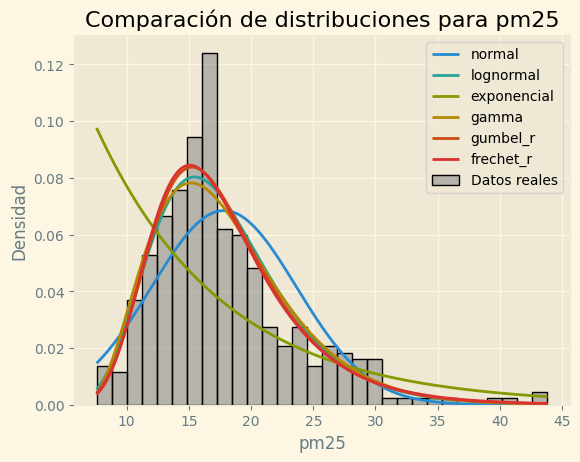

In [108]:
analizar_distribuciones(df_clean, 'pm25', nombre_visible='pm25')

In [98]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                logpm25   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1.665
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.230
Time:                        01:27:01   Log-Likelihood:                 3.7608
No. Observations:                  15   AIC:                            -1.522
Df Residuals:                      12   BIC:                            0.6026
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.9725      0.585      3.373      

In [100]:
from scipy.stats import shapiro


In [101]:
#residuales 
residuales = modelo.resid

# Test de normalidad en residuos
_, p_value = shapiro(residuales)
print(f"Normalidad de residuos (p > 0.05): {p_value > 0.05}")

Normalidad de residuos (p > 0.05): True


In [102]:
residuos = modelo.resid.values

In [103]:
from esda.moran import Moran

In [156]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,hora,r2,beta_temp,beta_pp,p_temp,p_pp
0,1,0.218629,0.065020,-0.003510,0.093881,0.972149
1,2,0.414017,0.077568,0.273522,0.034170,0.092251
2,3,0.355051,0.093021,0.252264,0.027097,0.224358
3,4,0.280162,0.085417,0.121088,0.051609,0.722143
4,5,0.341419,0.107672,-0.696257,0.028426,0.346560
5,6,0.309827,0.094992,0.183784,0.044230,0.781312
6,7,0.441181,0.136621,0.706078,0.010406,0.135479
7,8,0.480372,0.134895,2.848380,0.011242,0.121792
8,9,0.515417,0.106421,5.800769,0.012602,0.057229
9,10,0.659419,0.122455,5.168913,0.000910,0.008502


**Se aplicó el modelo OLS a mis datos promediados por horas**
se puede observar los coeficientes de cada una de las variables dependientes y cuando son significativos, la linea gris solo dicen si los coeficientes son positivos o negativos, se puede ver que la temperatura crece en coeficiente de 6 a 11 de la mañana mientras que va disminuyendo después. 

para la precipitación se presenta mayores coeficientes a las 10 de la mañana, se presentas coeficientes altos y niveles de significancia buenos , además de representabilidad . Estos datos quieren decir que a mayor precipitación mayor material particulado, esto se puede deber a los picos de contaminación además de que se puede generar una estabilización temprana atmosférica lo cual puede generar que haya un atrapamiento de contaminantes.


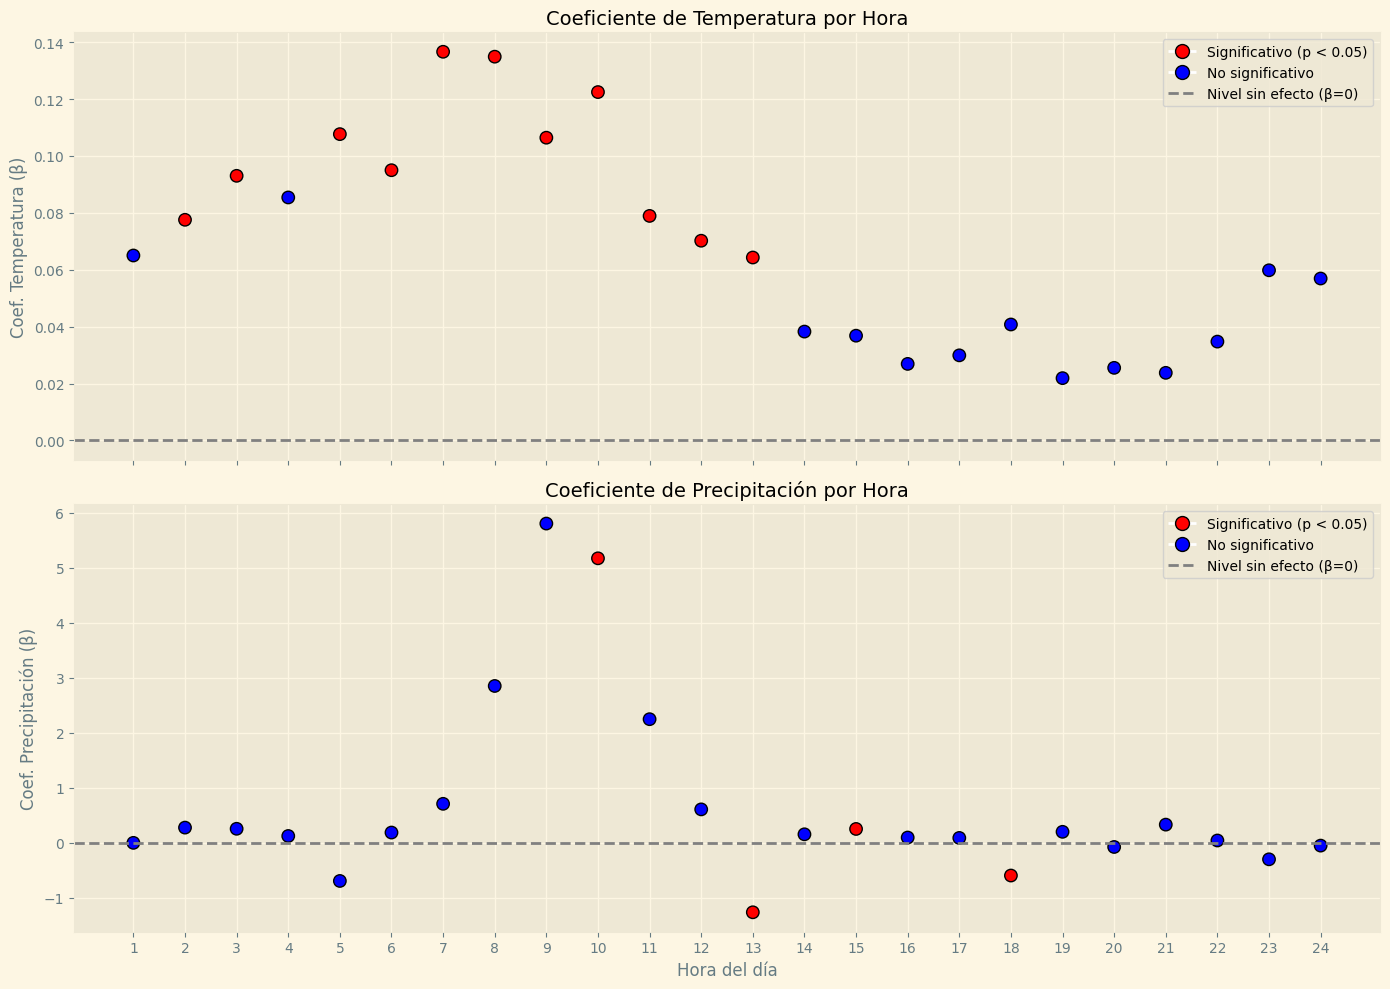

In [157]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)


horas = np.arange(1, 25)


df_resultados = df_resultados.set_index('hora').reindex(horas).reset_index()
colores_temp = ['red' if p < 0.05 else 'blue' for p in df_resultados['p_temp']]
colores_pp = ['red' if p < 0.05 else 'blue' for p in df_resultados['p_pp']]

# --- 1. Temperatura
ax[0].scatter(df_resultados['hora'], df_resultados['beta_temp'],
              c=colores_temp, s=80, edgecolor='k')
ax[0].axhline(0, color='gray', linestyle='--', label='Nivel sin efecto (β=0)')
ax[0].set_title('Coeficiente de Temperatura por Hora', fontsize=14)
ax[0].set_ylabel('Coef. Temperatura (β)', fontsize=12)
ax[0].grid(True)

# --- 2. Precipitación
ax[1].scatter(df_resultados['hora'], df_resultados['beta_pp'],
              c=colores_pp, s=80, edgecolor='k')
ax[1].axhline(0, color='gray', linestyle='--', label='Nivel sin efecto (β=0)')
ax[1].set_title('Coeficiente de Precipitación por Hora', fontsize=14)
ax[1].set_xlabel('Hora del día', fontsize=12)
ax[1].set_ylabel('Coef. Precipitación (β)', fontsize=12)
ax[1].grid(True)

# Eje X con todas las horas
ax[1].set_xticks(horas)


leyenda = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markeredgecolor='k', markersize=10, label='Significativo (p < 0.05)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markeredgecolor='k', markersize=10, label='No significativo'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Nivel sin efecto (β=0)')
]
ax[0].legend(handles=leyenda, loc='upper right')
ax[1].legend(handles=leyenda, loc='upper right')

plt.tight_layout()
plt.show()

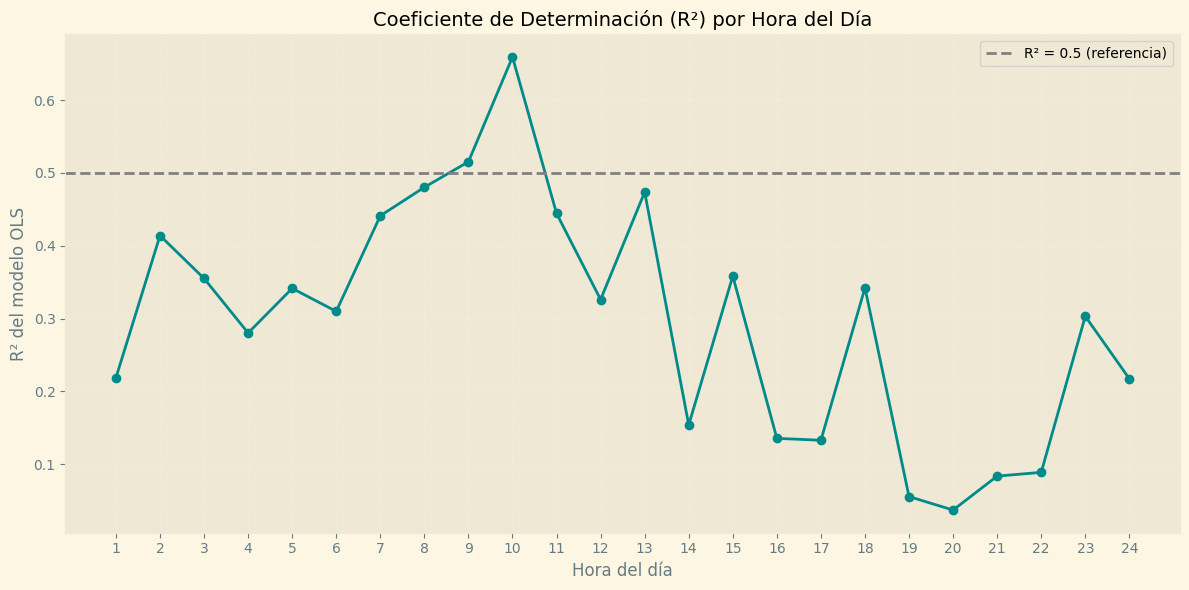

In [158]:
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 6))

# Gráfico de R² por hora
plt.plot(df_resultados['hora'], df_resultados['r2'], marker='o', color='darkcyan', linewidth=2)
plt.axhline(0.5, color='gray', linestyle='--', label='R² = 0.5 (referencia)')

# Estética del gráfico
plt.title('Coeficiente de Determinación (R²) por Hora del Día', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('R² del modelo OLS', fontsize=12)
plt.xticks(range(1, 25))
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Apliando modelos SAR y CAR  a mis datos obtengo 
1. aplica la matriz de vecinos
2. Se ajusta los modelos CAR y SAR
3. Análisis


In [182]:
#para modelo car y sar se uso ambiente espacial_pm25

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\SKop981040\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [80]:
esthorario= pd.merge(estaciones, df_clean, on="Codigo")
esthorario

,Codigo,Estacion,Longitud,Latitud,Ciudad,geometry,hora,pm25,pp_horaria,temperatura,logpm25
0,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),1,28.026581,0.294968,19.163871,3.368212
1,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2,27.870992,0.540774,18.928801,3.362837
2,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),3,27.077382,1.122516,18.679000,3.334964
3,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),4,26.379148,0.409677,18.487376,3.309782
4,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),5,26.380198,0.270387,18.398113,3.309820
...,...,...,...,...,...,...,...,...,...,...,...
355,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),20,11.010333,0.098323,12.894070,2.485767
356,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),21,12.649717,0.409677,12.673548,2.613719
357,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),22,12.676909,0.122903,12.506495,2.615709
358,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),23,11.904949,0.155677,12.283457,2.557611


In [81]:
esthorario= gpd.GeoDataFrame(esthorario, geometry=gpd.points_from_xy(esthorario['Longitud'], esthorario['Latitud']))
esthorario= esthorario.set_crs("EPSG:4326") 

In [82]:
esthorario

,Codigo,Estacion,Longitud,Latitud,Ciudad,geometry,hora,pm25,pp_horaria,temperatura,logpm25
0,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),1,28.026581,0.294968,19.163871,3.368212
1,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2,27.870992,0.540774,18.928801,3.362837
2,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),3,27.077382,1.122516,18.679000,3.334964
3,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),4,26.379148,0.409677,18.487376,3.309782
4,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),5,26.380198,0.270387,18.398113,3.309820
...,...,...,...,...,...,...,...,...,...,...,...
355,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),20,11.010333,0.098323,12.894070,2.485767
356,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),21,12.649717,0.409677,12.673548,2.613719
357,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),22,12.676909,0.122903,12.506495,2.615709
358,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),23,11.904949,0.155677,12.283457,2.557611


In [83]:
#matriz
from libpysal.weights import KNN
w_knn=KNN.from_dataframe(esthorario, k=3)
w_knn.transform = 'r'

In [85]:
pip install esda

  Using cached esda-2.7.0-py3-none-any.whl.metadata (2.0 kB)
Using cached esda-2.7.0-py3-none-any.whl (142 kB)
Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install statsmodels

  Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [st

In [86]:
import pandas as pd
import numpy as np
from libpysal.weights import KNN
from esda.moran import Moran
import statsmodels.api as sm

resultados_moran_residuos = []

for h in range(1, 25):
    df_h = esthorario[esthorario['hora'] == h]
    
    if len(df_h) < 10:
        continue
    
    y = df_h['logpm25'].values
    X = sm.add_constant(df_h[['temperatura', 'pp_horaria']])
    
    modelo = sm.OLS(y, X).fit()
    residuos = modelo.resid

    coords = df_h[['Longitud', 'Latitud']].values
    w = KNN.from_array(coords, k=3)
    w.transform = 'r'
    
    moran_res = Moran(residuos, w, permutations=999)

    resultados_moran_residuos.append({
        'hora': h,
        'r2': modelo.rsquared,
        'I_resid': moran_res.I,
        'p_resid': moran_res.p_sim
    })

df_moran_res = pd.DataFrame(resultados_moran_residuos)
print(df_moran_res)


    hora        r2   I_resid  p_resid
0      1  0.218629  0.274442    0.039
1      2  0.414017  0.292928    0.023
2      3  0.355051  0.053595    0.205
3      4  0.280162  0.206743    0.056
4      5  0.341419  0.275323    0.036
5      6  0.309827  0.252934    0.029
6      7  0.441181  0.277346    0.023
7      8  0.480372  0.119929    0.143
8      9  0.515417  0.157029    0.097
9     10  0.659419  0.139539    0.119
10    11  0.444408  0.120139    0.137
11    12  0.326033  0.220228    0.051
12    13  0.473735 -0.033769    0.379
13    14  0.153801  0.154260    0.073
14    15  0.358388  0.399851    0.011
15    16  0.135303  0.183174    0.049
16    17  0.132685 -0.064701    0.449
17    18  0.342186  0.057457    0.210
18    19  0.055286  0.161887    0.077
19    20  0.036748  0.187564    0.055
20    21  0.083405  0.288813    0.027
21    22  0.088570  0.278084    0.027
22    23  0.303114  0.088228    0.141
23    24  0.217247  0.269373    0.030


Nos damos cuenta que aplicando moran podemos ver que a varias horas del día hay espacialidad en los residuos por lo cual se realizó el modelo CAR Y SAR , en este caso utilizamos el CAR(ML error) ya que los residuos mostraron dependencia espacial significativa y usamos SAR lag para mirar si esto puede afectar a otras vecinas 

**se utilizaron modelos SAR Y CAR**
SAR de máxima verosimilitud donde rh mide la dependencia espacial de variables dependientes sobre otras , o sea mis estaciones sobre otras 
CAR modelo de error espacial , lambda captura la correlación espacial en los errores

In [87]:
resultados_sar = []
resultados_car = []

for h in range(1, 25):
    df_h = esthorario[esthorario['hora'] == h]

    if len(df_h) < 10:
        continue

    # Matriz espacial por hora con KNN
    w_h = KNN.from_dataframe(df_h, k=3)
    w_h.transform = 'r'

    # Variables independientes y dependiente
    X = df_h[['temperatura', 'pp_horaria']].values
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # agregar constante
    y = df_h['logpm25'].values.reshape(-1, 1)

    try:
        # Modelo SAR
        modelo_sar = ML_Lag(y, X, w=w_h, name_y='logpm25', name_x=['const', 'temperatura', 'pp_horaria'])

        resultados_sar.append({
            'hora': h,
            'r2_sar': modelo_sar.pr2,
            'beta_temp_sar': modelo_sar.betas[1][0],
            'beta_pp_sar': modelo_sar.betas[2][0],
            'rho': modelo_sar.rho,
            'p_temp_sar': modelo_sar.z_stat[1][1],
            'p_pp_sar': modelo_sar.z_stat[2][1],
            'p_rho': modelo_sar.z_stat[3][1]
        })
        #car
        modelo_car = ML_Error(y, X, w=w_h, name_y='logpm25', name_x=['const', 'temperatura', 'pp_horaria'])
        resultados_car.append({
            'hora': h,
            'r2_car': modelo_car.pr2,
            'beta_temp_car': modelo_car.betas[1][0],
            'beta_pp_car': modelo_car.betas[2][0],
            'lambda': modelo_car.z_stat[3][0],    # ← valor estimado de lambda
            'p_temp_car': modelo_car.z_stat[1][1],
            'p_pp_car': modelo_car.z_stat[2][1],
            'p_lambda': modelo_car.z_stat[3][1]   # ← p-valor de lambda
})

    except Exception as e:
        print(f"Error en hora {h}: {e}")


In [88]:

df_sar = pd.DataFrame(resultados_sar)
df_car = pd.DataFrame(resultados_car)


In [89]:
df_car

,hora,r2_car,beta_temp_car,beta_pp_car,lambda,p_temp_car,p_pp_car,p_lambda
0,1,0.218263,0.069889,-0.011648,1.854749,7.453088e-03,0.912417,0.063632
1,2,0.412605,0.084991,0.267113,1.590008,5.155537e-04,0.037958,0.111833
2,3,0.346911,0.089003,0.171588,0.658361,4.309830e-03,0.337859,0.510306
3,4,0.275740,0.087634,0.032173,1.335959,4.571958e-03,0.904785,0.181563
4,5,0.340976,0.110886,-0.775981,1.926675,2.634386e-04,0.125217,0.054020
5,6,0.306162,0.100044,0.021136,1.675880,1.674277e-03,0.971570,0.093762
6,7,0.437512,0.135285,0.584758,1.925926,3.536192e-05,0.097411,0.054114
7,8,0.475441,0.138707,2.297496,0.767367,2.720741e-04,0.135216,0.442863
8,9,0.515090,0.113931,5.891814,0.926081,1.543250e-04,0.029411,0.354404
9,10,0.659182,0.122922,5.029995,1.449652,3.262804e-08,0.000790,0.147156


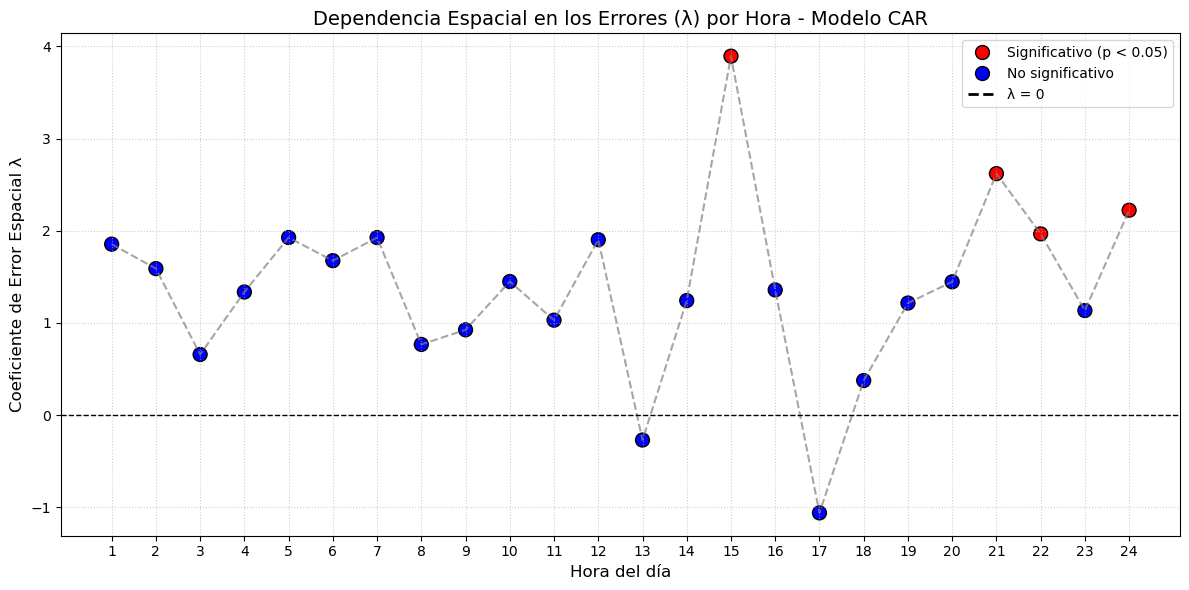

In [90]:
from matplotlib.lines import Line2D


plt.figure(figsize=(12, 6))

# Colores según significancia
colores = ['red' if p < 0.05 else 'blue' for p in df_car['p_lambda']]

# Graficar
plt.scatter(df_car['hora'], df_car['lambda'], c=colores, s=100, edgecolors='black')
plt.plot(df_car['hora'], df_car['lambda'], color='gray', linestyle='--', alpha=0.7)

# Línea horizontal en y = 0
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='λ = 0 (sin dependencia espacial)')

# Título y ejes
plt.title('Dependencia Espacial en los Errores (λ) por Hora - Modelo CAR', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Coeficiente de Error Espacial λ', fontsize=12)
plt.xticks(range(1, 25))

leyenda = [
    Line2D([0], [0], marker='o', color='w', label='Significativo (p < 0.05)',
           markerfacecolor='red', markeredgecolor='k', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='No significativo',
           markerfacecolor='blue', markeredgecolor='k', markersize=10),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label='λ = 0')
]
plt.legend(handles=leyenda, loc='upper right')

plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


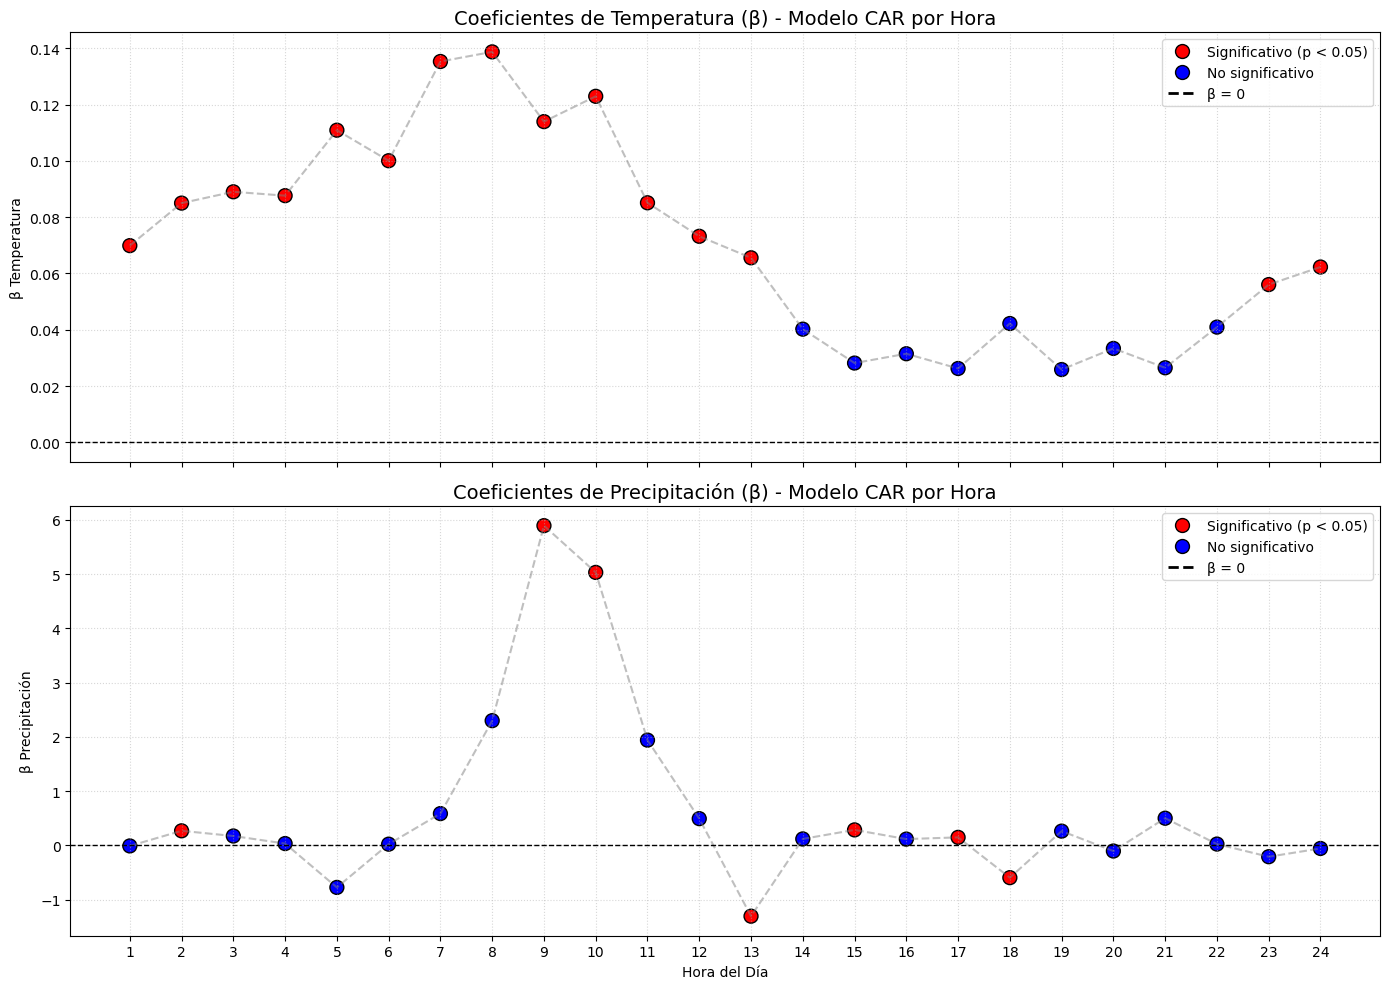

In [91]:
from matplotlib.lines import Line2D


fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)


signif_temp = df_car['p_temp_car'] < 0.05
ax[0].scatter(df_car['hora'],df_car['beta_temp_car'],
              c=signif_temp.map({True: 'red', False: 'blue'}),
              edgecolors='k', s=100)
ax[0].plot(df_car['hora'], df_car['beta_temp_car'], color='gray', linestyle='--', alpha=0.5)
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)
ax[0].set_title('Coeficientes de Temperatura (β) - Modelo CAR por Hora', fontsize=14)
ax[0].set_ylabel('β Temperatura')
ax[0].grid(True, linestyle=':', alpha=0.5)

# --- Gráfico de β precipitación ---
signif_pp = df_car['p_pp_car'] < 0.05
ax[1].scatter(df_car['hora'], df_car['beta_pp_car'],
              c=signif_pp.map({True: 'red', False: 'blue'}),
              edgecolors='k', s=100)
ax[1].plot(df_car['hora'], df_car['beta_pp_car'], color='gray', linestyle='--', alpha=0.5)
ax[1].axhline(0, color='black', linestyle='--', linewidth=1)
ax[1].set_title('Coeficientes de Precipitación (β) - Modelo CAR por Hora', fontsize=14)
ax[1].set_xlabel('Hora del Día')
ax[1].set_ylabel('β Precipitación')
ax[1].set_xticks(range(1, 25))
ax[1].grid(True, linestyle=':', alpha=0.5)

# Leyenda
leyenda = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markeredgecolor='k', markersize=10, label='Significativo (p < 0.05)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markeredgecolor='k', markersize=10, label='No significativo'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label='β = 0')
]
ax[0].legend(handles=leyenda, loc='upper right')
ax[1].legend(handles=leyenda, loc='upper right')

plt.tight_layout()
plt.show()


In [92]:
df_sar

,hora,r2_sar,beta_temp_sar,beta_pp_sar,rho,p_temp_sar,p_pp_sar,p_rho
0,1,0.385969,0.079628,0.014362,0.466707,5.627012e-03,0.856753,0.045610
1,2,0.528146,0.091361,0.256866,0.416984,5.126011e-04,0.040554,0.056649
2,3,0.396877,0.097211,0.168842,0.269482,2.738181e-03,0.323069,0.329932
3,4,0.374613,0.095128,-0.068860,0.388195,4.135400e-03,0.807749,0.130776
4,5,0.492253,0.131789,-1.006317,0.473845,1.658914e-04,0.078935,0.039609
5,6,0.418978,0.109060,0.057850,0.388442,1.992991e-03,0.914847,0.126464
6,7,0.549472,0.150129,0.628521,0.409592,4.504149e-05,0.076417,0.082594
7,8,0.525823,0.145931,2.220523,0.283983,1.642870e-04,0.137178,0.255508
8,9,0.550058,0.116048,5.079547,0.253816,2.186262e-04,0.054630,0.285118
9,10,0.712434,0.133400,4.720025,0.339964,9.130852e-09,0.000755,0.068346


In [93]:
from spreg import ML_Lag, ML_Error
import geopandas as gpd
from libpysal.weights import KNN

# Recorremos hora por hora
for h in range(1, 25):
    df_h = esthorario[esthorario['hora'] == h]
    
    if len(df_h) < 10:
        print(f"--- Hora {h} OMITIDA (menos de 10 observaciones) ---\n")
        continue
    
    # Crear GeoDataFrame por hora
    gdf_h = gpd.GeoDataFrame(df_h, geometry=gpd.points_from_xy(df_h['Longitud'], df_h['Latitud']), crs="EPSG:4326")
    
    # Matriz de pesos
    w_h = KNN.from_dataframe(gdf_h, k=3)
    w_h.transform = 'r'

    # Definir X y y
    X = df_h[['temperatura', 'pp_horaria']].values
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # agregar constante
    y = df_h['pm25'].values.reshape(-1, 1)

    try:
        print(f"\n================== HORA {h} - MODELO SAR ==================\n")
        modelo_sar = ML_Lag(y, X, w=w_h, name_y='pm25', name_x=['const', 'temperatura', 'pp_horaria'])
        print(modelo_sar.summary)

        print(f"\n================== HORA {h} - MODELO CAR ==================\n")
        modelo_car = ML_Error(y, X, w=w_h, name_y='pm25', name_x=['const', 'temperatura', 'pp_horaria'])
        print(modelo_car.summary)

    except Exception as e:
        print(f"❌ Error en hora {h}: {e}")



================== HORA 1 - MODELO SAR ==================

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :        pm25                Number of Observations:          15
Mean dependent var  :     17.5233                Number of Variables   :           4
S.D. dependent var  :      4.3386                Degrees of Freedom    :          11
Pseudo R-squared    :      0.3341
Spatial Pseudo R-squared:  0.1993
Log likelihood      :    -40.1842
Sigma-square ML     :     11.8080                Akaike info criterion :      88.368
S.E of regression   :      3.4363                Schwarz criterion     :      91.201

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---

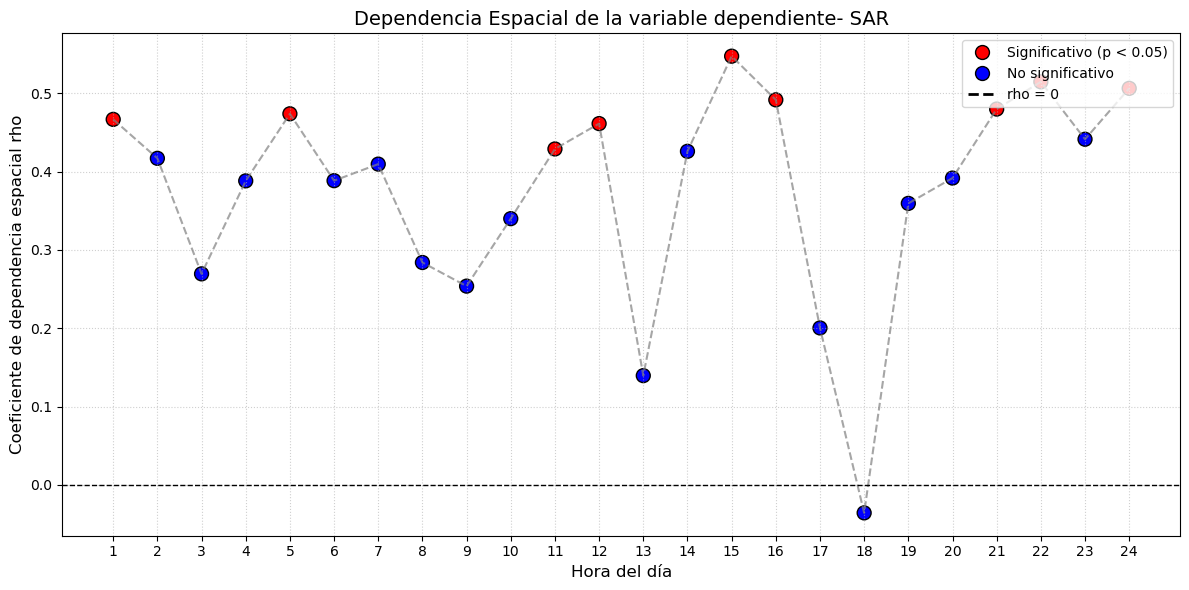

In [94]:
from matplotlib.lines import Line2D


plt.figure(figsize=(12, 6))

# Colores según significancia
colores = ['red' if p < 0.05 else 'blue' for p in df_sar['p_rho']]

# Graficar
plt.scatter(df_sar['hora'], df_sar['rho'], c=colores, s=100, edgecolors='black')
plt.plot(df_sar['hora'], df_sar['rho'], color='gray', linestyle='--', alpha=0.7)

# Línea horizontal en y = 0
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='rho = 0 (sin dependencia espacial)')

# Título y ejes
plt.title('Dependencia Espacial de la variable dependiente- SAR', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Coeficiente de dependencia espacial rho', fontsize=12)
plt.xticks(range(1, 25))


leyenda = [
    Line2D([0], [0], marker='o', color='w', label='Significativo (p < 0.05)',
           markerfacecolor='red', markeredgecolor='k', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='No significativo',
           markerfacecolor='blue', markeredgecolor='k', markersize=10),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label='rho = 0')
]
plt.legend(handles=leyenda, loc='upper right')

plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


In [95]:
df_sar

,hora,r2_sar,beta_temp_sar,beta_pp_sar,rho,p_temp_sar,p_pp_sar,p_rho
0,1,0.385969,0.079628,0.014362,0.466707,5.627012e-03,0.856753,0.045610
1,2,0.528146,0.091361,0.256866,0.416984,5.126011e-04,0.040554,0.056649
2,3,0.396877,0.097211,0.168842,0.269482,2.738181e-03,0.323069,0.329932
3,4,0.374613,0.095128,-0.068860,0.388195,4.135400e-03,0.807749,0.130776
4,5,0.492253,0.131789,-1.006317,0.473845,1.658914e-04,0.078935,0.039609
5,6,0.418978,0.109060,0.057850,0.388442,1.992991e-03,0.914847,0.126464
6,7,0.549472,0.150129,0.628521,0.409592,4.504149e-05,0.076417,0.082594
7,8,0.525823,0.145931,2.220523,0.283983,1.642870e-04,0.137178,0.255508
8,9,0.550058,0.116048,5.079547,0.253816,2.186262e-04,0.054630,0.285118
9,10,0.712434,0.133400,4.720025,0.339964,9.130852e-09,0.000755,0.068346


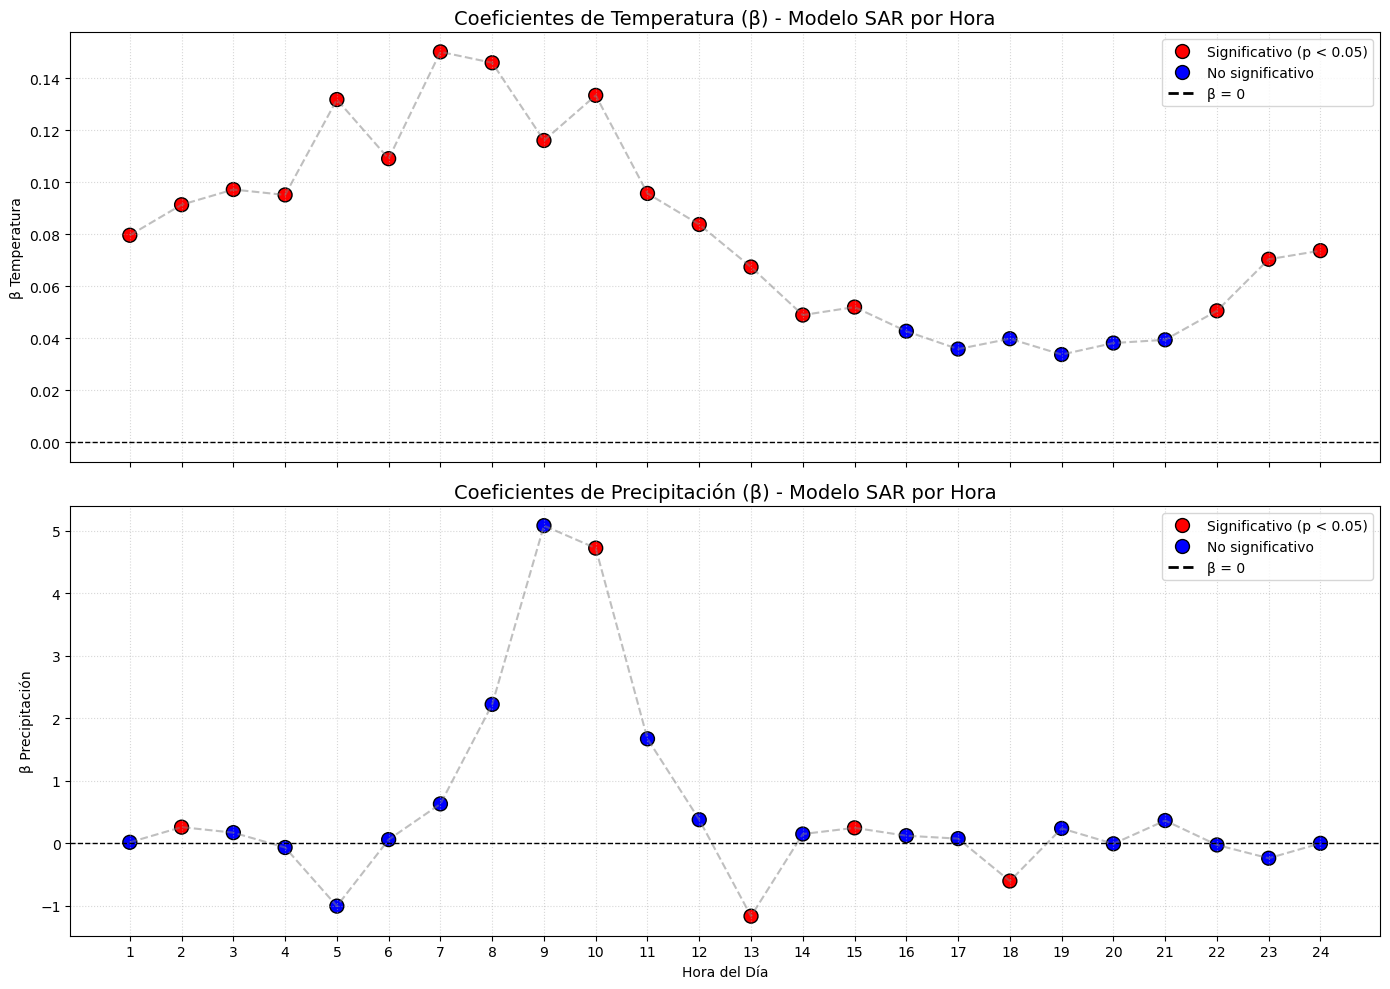

In [96]:
from matplotlib.lines import Line2D

# Crear figura
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# --- Gráfico de β temperatura ---
signif_temp = df_sar['p_temp_sar'] < 0.05
ax[0].scatter(df_sar['hora'],df_sar['beta_temp_sar'],
              c=signif_temp.map({True: 'red', False: 'blue'}),
              edgecolors='k', s=100)
ax[0].plot(df_sar['hora'], df_sar['beta_temp_sar'], color='gray', linestyle='--', alpha=0.5)
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)
ax[0].set_title('Coeficientes de Temperatura (β) - Modelo SAR por Hora', fontsize=14)
ax[0].set_ylabel('β Temperatura')
ax[0].grid(True, linestyle=':', alpha=0.5)

# --- Gráfico de β precipitación ---
signif_pp = df_sar['p_pp_sar'] < 0.05
ax[1].scatter(df_sar['hora'], df_sar['beta_pp_sar'],
              c=signif_pp.map({True: 'red', False: 'blue'}),
              edgecolors='k', s=100)
ax[1].plot(df_sar['hora'], df_sar['beta_pp_sar'], color='gray', linestyle='--', alpha=0.5)
ax[1].axhline(0, color='black', linestyle='--', linewidth=1)
ax[1].set_title('Coeficientes de Precipitación (β) - Modelo SAR por Hora', fontsize=14)
ax[1].set_xlabel('Hora del Día')
ax[1].set_ylabel('β Precipitación')
ax[1].set_xticks(range(1, 25))
ax[1].grid(True, linestyle=':', alpha=0.5)

# Leyenda
leyenda = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markeredgecolor='k', markersize=10, label='Significativo (p < 0.05)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markeredgecolor='k', markersize=10, label='No significativo'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label='β = 0')
]
ax[0].legend(handles=leyenda, loc='upper right')
ax[1].legend(handles=leyenda, loc='upper right')

plt.tight_layout()
plt.show()


In [183]:
esthorario

,Codigo,Estacion,Longitud,Latitud,Ciudad,geometry,hora,pm25,pp_horaria,temperatura,logpm25
0,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),1,28.026581,0.294968,19.163871,3.368212
1,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2,27.870992,0.540774,18.928801,3.362837
2,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),3,27.077382,1.122516,18.679000,3.334964
3,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),4,26.379148,0.409677,18.487376,3.309782
4,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),5,26.380198,0.270387,18.398113,3.309820
...,...,...,...,...,...,...,...,...,...,...,...
355,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),20,11.010333,0.098323,12.894070,2.485767
356,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),21,12.649717,0.409677,12.673548,2.613719
357,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),22,12.676909,0.122903,12.506495,2.615709
358,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),23,11.904949,0.155677,12.283457,2.557611


In [7]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas as pd


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [29]:
import pandas as pd
esthorario = pd.read_excel(r"C:\Users\Documents\unal\analisis geoespacial\horario.xlsx")
esthorario

,Unnamed: 0,Codigo,Estacion,Longitud,Latitud,Ciudad,geometry,hora,pm25,pp_horaria,temperatura,logpm25
0,0,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),1,28.026581,0.294968,19.163871,3.368212
1,1,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2,27.870992,0.540774,18.928801,3.362837
2,2,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),3,27.077382,1.122516,18.679000,3.334964
3,3,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),4,26.379148,0.409677,18.487376,3.309782
4,4,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),5,26.380198,0.270387,18.398113,3.309820
...,...,...,...,...,...,...,...,...,...,...,...,...
355,355,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),20,11.010333,0.098323,12.894070,2.485767
356,356,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),21,12.649717,0.409677,12.673548,2.613719
357,357,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),22,12.676909,0.122903,12.506495,2.615709
358,358,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),23,11.904949,0.155677,12.283457,2.557611


In [3]:
esthorario.columns

Index(['Unnamed: 0', 'Codigo', 'Estacion', 'Longitud', 'Latitud', 'Ciudad',
       'geometry', 'hora', 'pm25', 'pp_horaria', 'temperatura', 'logpm25'],
      dtype='object')

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf



# 2. Crear variables cíclicas para la hora (para capturar patrones diurnos/nocturnos)
esthorario['hora_sin'] = np.sin(2 * np.pi * esthorario['hora'] / 24)
esthorario['hora_cos'] = np.cos(2 * np.pi * esthorario['hora'] / 24)

# 3. Modelo de Poisson (GLM) con efectos fijos
modelo_poisson = smf.glm(
    formula="pm25 ~ pp_horaria + temperatura + hora_sin + hora_cos",  # Fórmula del modelo
    data=esthorario,
    family=sm.families.Poisson()  # Familia Poisson para conteos
).fit()

# 4. Resumen del modelo
print(modelo_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   pm25   No. Observations:                  360
Model:                            GLM   Df Residuals:                      355
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1078.2
Date:                Tue, 24 Jun 2025   Deviance:                       471.39
Time:                        17:12:17   Pearson chi2:                     490.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3635
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.8008      0.133     13.536      

con el modelo lineal generalizado de la familia Poisson se puede observar como el material particulado varia a lo largo de las horas sin tener en cuenta la espacialidad primeramente. Para la precipitación , se observa que el coeficiente es negativo , osea que cada unidad de lluvia reduce en un 7.4% , de igual manera a cada grado de temperatura aumenta el material particulado en un 5.9 %. los coeficientes de hora-sin y hora_cos capturan la variabilidad diurna la cual , es explicable por hora_sin la cual es significativa pero no por hora_cos aunque cerca. ( se colocaron de esta manera para poder verificar la variable circular. Como el coseno no fue significativo quiere decir que no hay variabilidad en picos y valles o sea que no es simétrica como lo sugiere el seno ( como podemos ver en la gráfica de abajo el pico es 5 am y valle 5 pm )

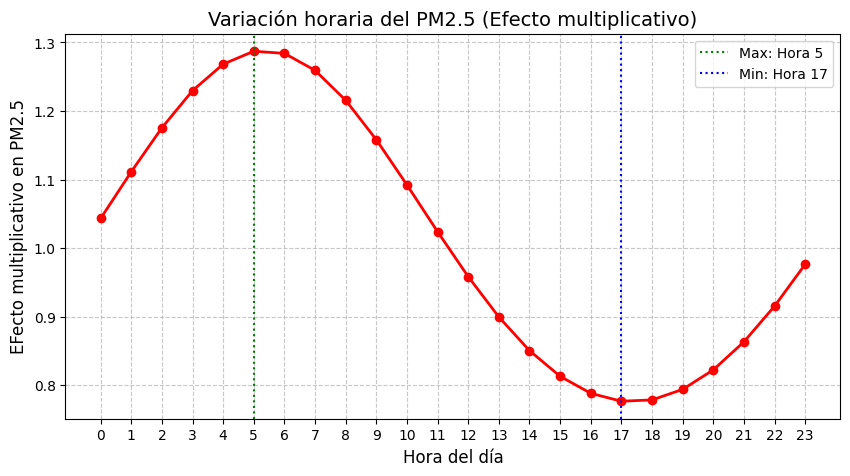

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Calcular el efecto horario
horas = np.arange(24)
sin = np.sin(2 * np.pi * horas / 24)
cos = np.cos(2 * np.pi * horas / 24)
efecto = np.exp(0.2500 * sin + 0.0424 * cos)  # exp(comb. lineal de coefs)

# 2. Crear el gráfico
plt.figure(figsize=(10, 5))
plt.plot(horas, efecto, marker='o', color='red', linestyle='-', linewidth=2)
plt.title("Variación horaria del PM2.5 (Efecto multiplicativo)", fontsize=14)
plt.xlabel("Hora del día", fontsize=12)
plt.ylabel("EFecto multiplicativo en PM2.5", fontsize=12)
plt.xticks(horas)
plt.grid(True, linestyle='--', alpha=0.7)

# 3. Destacar horas clave
max_hora = horas[np.argmax(efecto)]
min_hora = horas[np.argmin(efecto)]
plt.axvline(max_hora, color='green', linestyle=':', label=f'Max: Hora {max_hora}')
plt.axvline(min_hora, color='blue', linestyle=':', label=f'Min: Hora {min_hora}')
plt.legend()

plt.show()

In [35]:
print(esthorario.columns.tolist()) 

['Unnamed: 0', 'Estacion', 'Longitud', 'Latitud', 'Ciudad', 'geometry', 'hora', 'pm25', 'pp_horaria', 'temperatura', 'logpm25', 'hora_sin', 'hora_cos', 'Codigo_38', 'Codigo_69', 'Codigo_78', 'Codigo_79', 'Codigo_80', 'Codigo_81', 'Codigo_82', 'Codigo_83', 'Codigo_84', 'Codigo_85', 'Codigo_87', 'Codigo_88', 'Codigo_90', 'Codigo_94']


Incluimos los efectos aleatorios por estación en el modelo que se observa a continuación

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Lista de todas las columnas dummy de Codigo_XX
dummies_codigo = [col for col in esthorario.columns if col.startswith('Codigo_')]

# Fórmula dinámica que incluye pp_horaria, temperatura, hora_sin, hora_cos y todas las dummies
formula = f"pm25 ~ pp_horaria + temperatura + hora_sin + hora_cos + {' + '.join(dummies_codigo)}"

# Modelo Poisson GLM
modelo = smf.glm(
    formula=formula,
    data=esthorario,
    family=sm.families.Poisson()
).fit()

print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   pm25   No. Observations:                  360
Model:                            GLM   Df Residuals:                      341
Model Family:                 Poisson   Df Model:                           18
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -920.38
Date:                Tue, 24 Jun 2025   Deviance:                       155.73
Time:                        18:24:27   Pearson chi2:                     156.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.7351
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9884      0.30

In [21]:
from statsmodels.regression.mixed_linear_model import MixedLM  # Ruta correcta

# Modelo lineal mixto (Gaussiano)
modelo_gaussiano = MixedLM(
    endog=esthorario['pm25'],
    exog=sm.add_constant(esthorario[['pp_horaria', 'temperatura', 'hora_sin', 'hora_cos']]),
    groups=esthorario['Estacion']  # Usar 'Estacion' como identificador de grupos
).fit()

print(modelo_gaussiano.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pm25     
No. Observations: 360     Method:             REML     
No. Groups:       15      Scale:              9.7001   
Min. group size:  24      Log-Likelihood:     -947.0490
Max. group size:  24      Converged:          Yes      
Mean group size:  24.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
const        10.887    3.687  2.953 0.003  3.661 18.114
pp_horaria   -2.376    0.487 -4.883 0.000 -3.330 -1.422
temperatura   0.412    0.187  2.205 0.027  0.046  0.779
hora_sin      2.935    0.448  6.554 0.000  2.058  3.813
hora_cos     -0.544    0.498 -1.092 0.275 -1.520  0.432
Group Var    19.237    2.448                           



In [110]:
import geopandas as gpd
municipios=gpd.read_file(r"C:\Users\Documents\unal\analisis geoespacial\municipios.shp")
print(municipios)

    COD_MPIO             MPIO_NOMBR        SUBREGION  ALERTA DESCRIPCI   
0      05761               SOPETRÁN        OCCIDENTE       0      None  \
1      05425                  MACEO  MAGDALENA MEDIO       0      None   
2      05501                  OLAYA        OCCIDENTE       0      None   
3      05264             ENTRERRIOS            NORTE       0      None   
4      05042  SANTA FE DE ANTIOQUIA        OCCIDENTE       1      None   
..       ...                    ...              ...     ...       ...   
120    05031                 AMALFI         NORDESTE       0      None   
121    05893                  YONDÓ  MAGDALENA MEDIO       0      None   
122    05091                BETANIA         SUROESTE       0      None   
123    05086                BELMIRA            NORTE       0      None   
124    05411               LIBORINA        OCCIDENTE       0      None   

    SymbolID                                           geometry  
0       None  POLYGON ((-8427867 738709, -842

In [111]:
#análisis areas

esthorario['geometry'] = esthorario.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis=1)


esthorario = gpd.GeoDataFrame(esthorario, geometry='geometry', crs='EPSG:4326')
esthorario

,Codigo,Estacion,Longitud,Latitud,Ciudad,geometry,hora,pm25,pp_horaria,temperatura,logpm25
0,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),1,28.026581,0.294968,19.163871,3.368212
1,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2,27.870992,0.540774,18.928801,3.362837
2,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),3,27.077382,1.122516,18.679000,3.334964
3,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),4,26.379148,0.409677,18.487376,3.309782
4,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),5,26.380198,0.270387,18.398113,3.309820
...,...,...,...,...,...,...,...,...,...,...,...
355,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),20,11.010333,0.098323,12.894070,2.485767
356,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),21,12.649717,0.409677,12.673548,2.613719
357,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),22,12.676909,0.122903,12.506495,2.615709
358,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),23,11.904949,0.155677,12.283457,2.557611


In [112]:
municipios= municipios.to_crs("EPSG:4326")  

In [113]:
gdf_join = gpd.sjoin(esthorario, municipios, how='left', predicate='intersects')


In [114]:
variables = ['pm25', 'pp_horaria', 'temperatura']

# Promedios por municipio y hora
promedios = gdf_join.groupby(['Ciudad', 'hora'])[variables].mean().reset_index()
promedios


,Ciudad,hora,pm25,pp_horaria,temperatura
0,Barbosa,1,12.646820,0.213032,18.516828
1,Barbosa,2,12.615525,0.131097,18.307742
2,Barbosa,3,12.619358,0.270387,18.130484
3,Barbosa,4,12.533176,0.081935,17.948441
4,Barbosa,5,12.643484,0.245806,17.734570
...,...,...,...,...,...
235,Sabaneta,20,11.278385,0.950452,19.128296
236,Sabaneta,21,13.100584,0.196645,18.754177
237,Sabaneta,22,15.103969,0.139290,18.595957
238,Sabaneta,23,16.097587,0.335935,18.425317


In [115]:
promedios.rename(columns={'Ciudad': 'MPIO_NOMBR'}, inplace=True)


In [116]:
municipios["MPIO_NOMBR"]=municipios["MPIO_NOMBR"].str.lower().str.strip()
promedios["MPIO_NOMBR"] = promedios["MPIO_NOMBR"].str.lower().str.strip()

In [117]:
final=pd.merge(promedios, municipios, on='MPIO_NOMBR', how='left')

In [118]:
gdf_final = gpd.GeoDataFrame(final, geometry='geometry', crs=municipios.crs)

In [119]:
import matplotlib.pyplot as plt

def plot_24_maps_horizontal(gdf, variable, cmap='plasma'):
    # Valores mínimos y máximos para una escala de colores consistente
    vmin = gdf[variable].min()
    vmax = gdf[variable].max()
    
   
    fig, axes = plt.subplots(4, 6, figsize=(24, 16))
    axes = axes.flatten()

    for h in range(1, 25):
        ax = axes[h - 1]
        subset = gdf[gdf['hora'] == h]
        subset.plot(
            column=variable,
            cmap=cmap,
            linewidth=0.5,
            edgecolor='black',
            legend=False, 
            ax=ax,
            vmin=vmin,
            vmax=vmax
        )
        ax.set_title(f'Hora {h}', fontsize=10)
        ax.axis('off')

    # Agregar barra de color común
    fig.subplots_adjust(right=0.92)
    cax = fig.add_axes([0.94, 0.15, 0.015, 0.7])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []  # Sin esto no se muestra bien
    fig.colorbar(sm, cax=cax)

    fig.suptitle(variable.upper(), fontsize=18)
    plt.tight_layout(rect=[0, 0, 0.93, 0.95])
    plt.show()


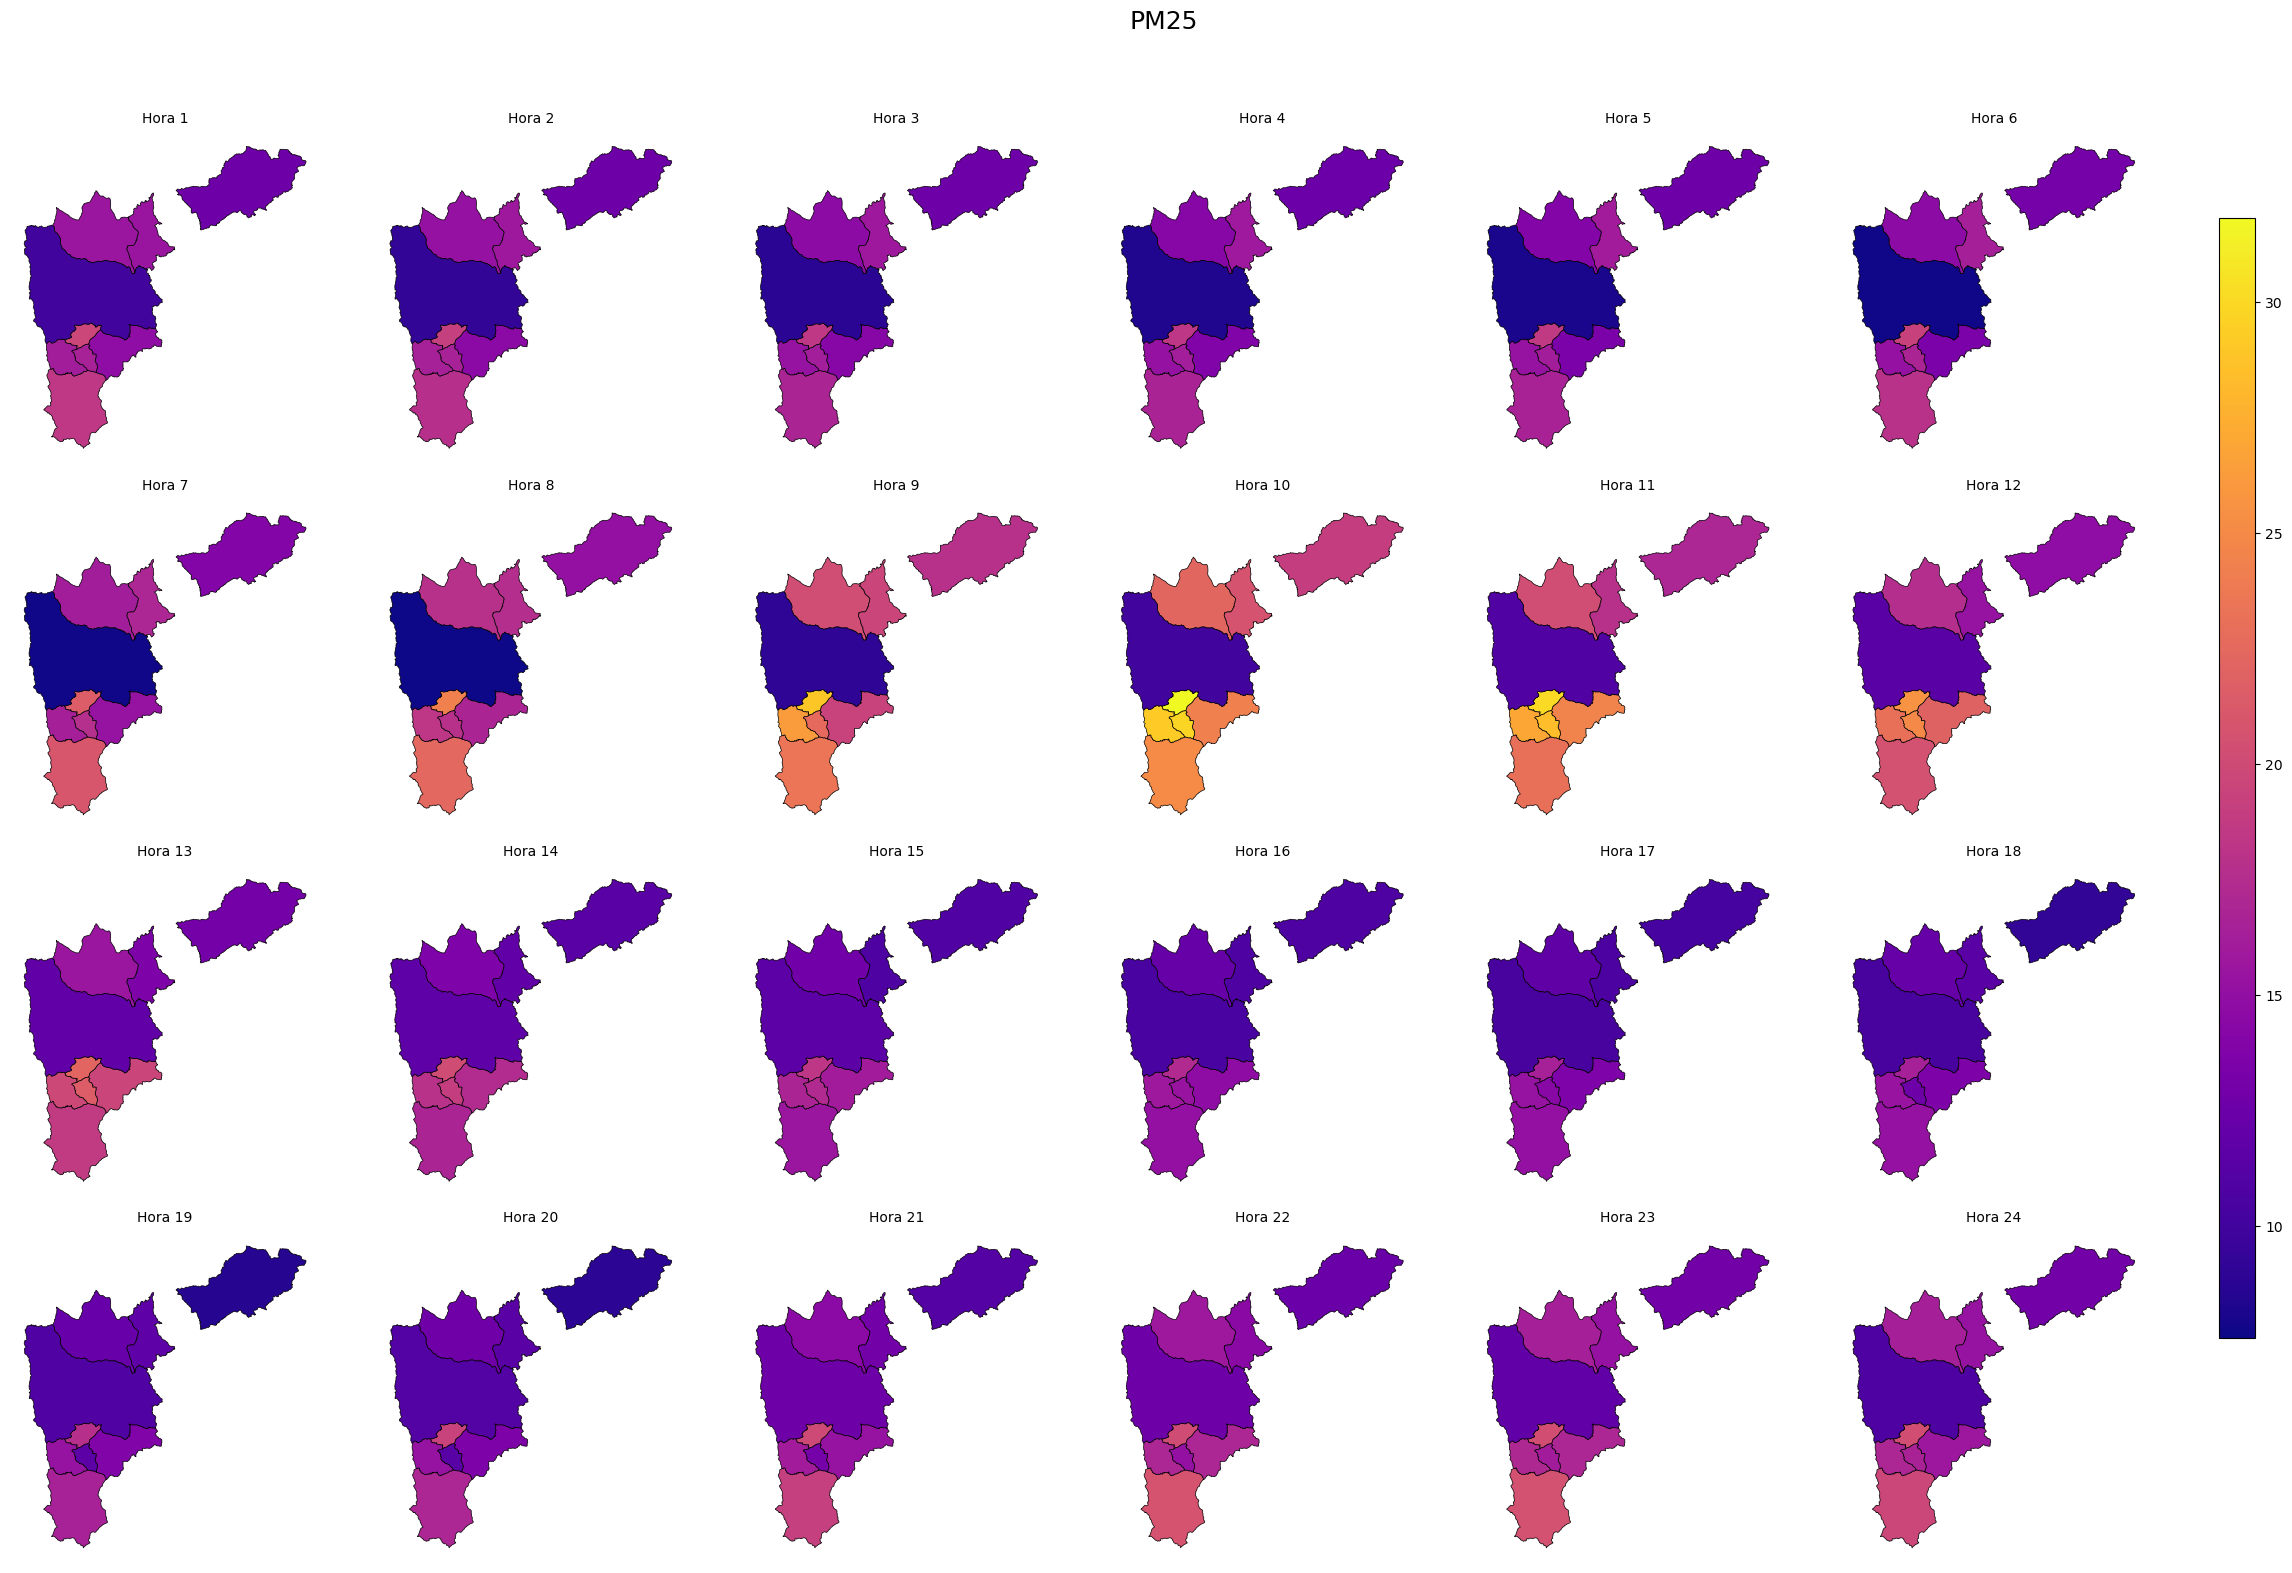

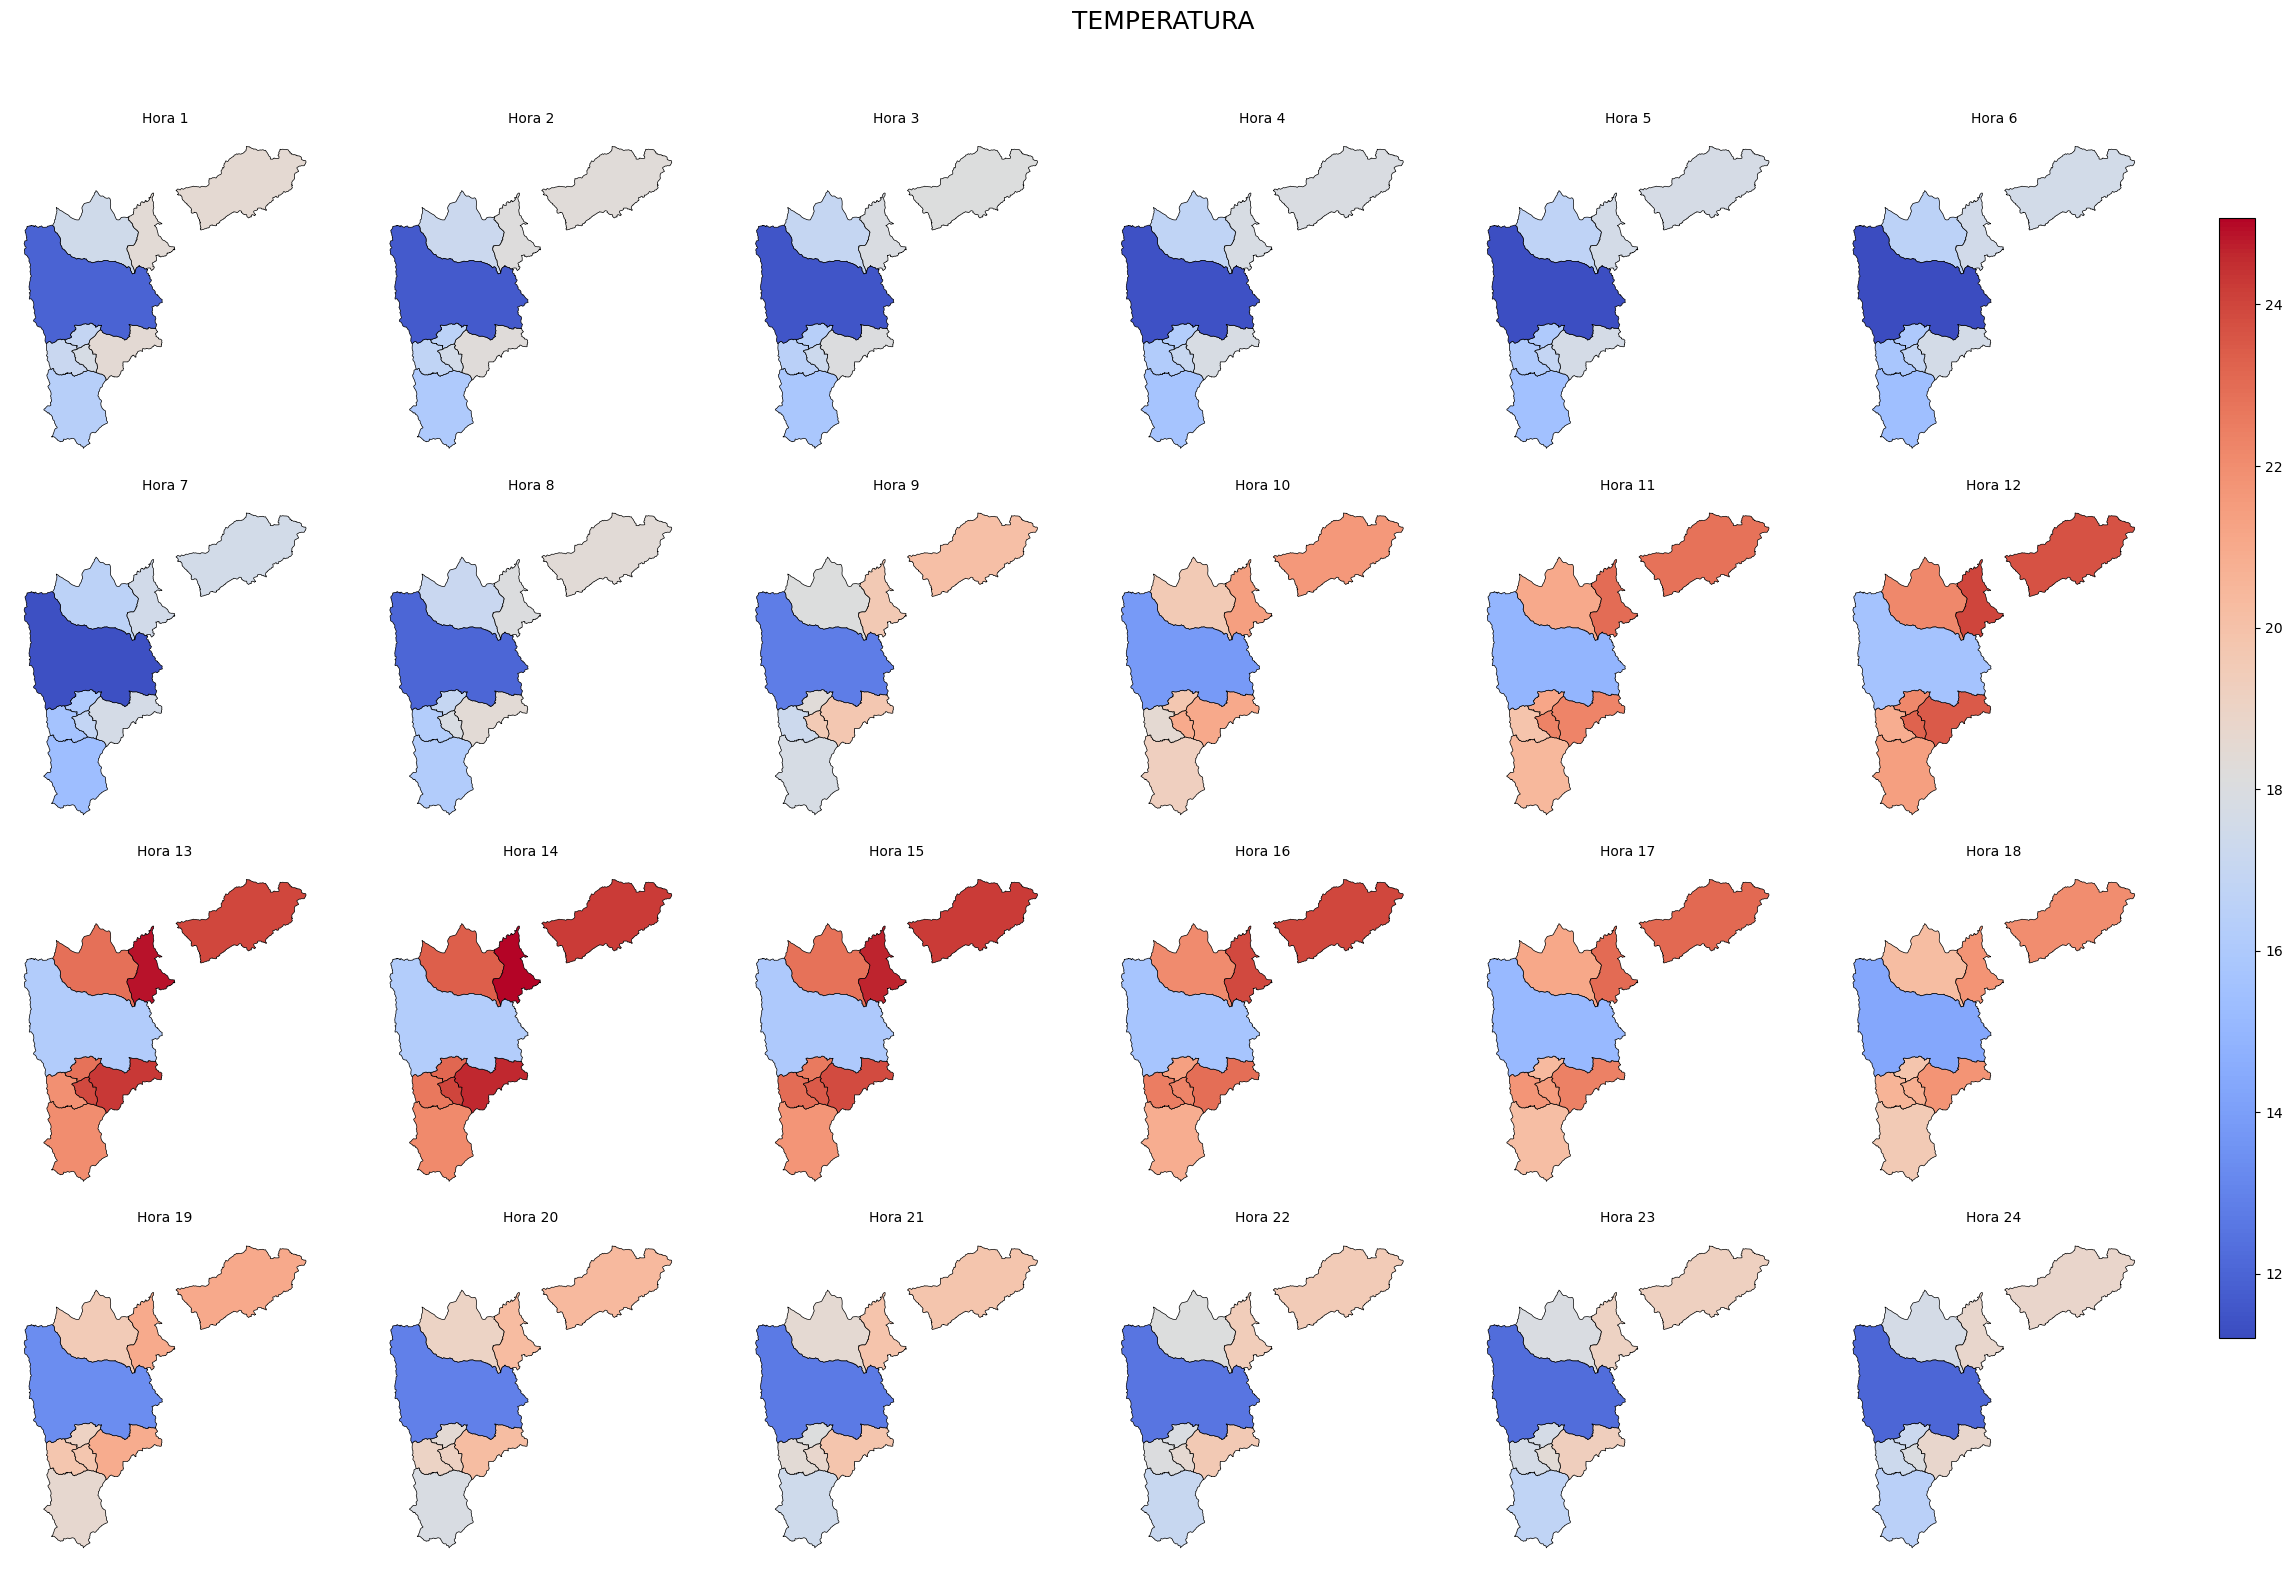

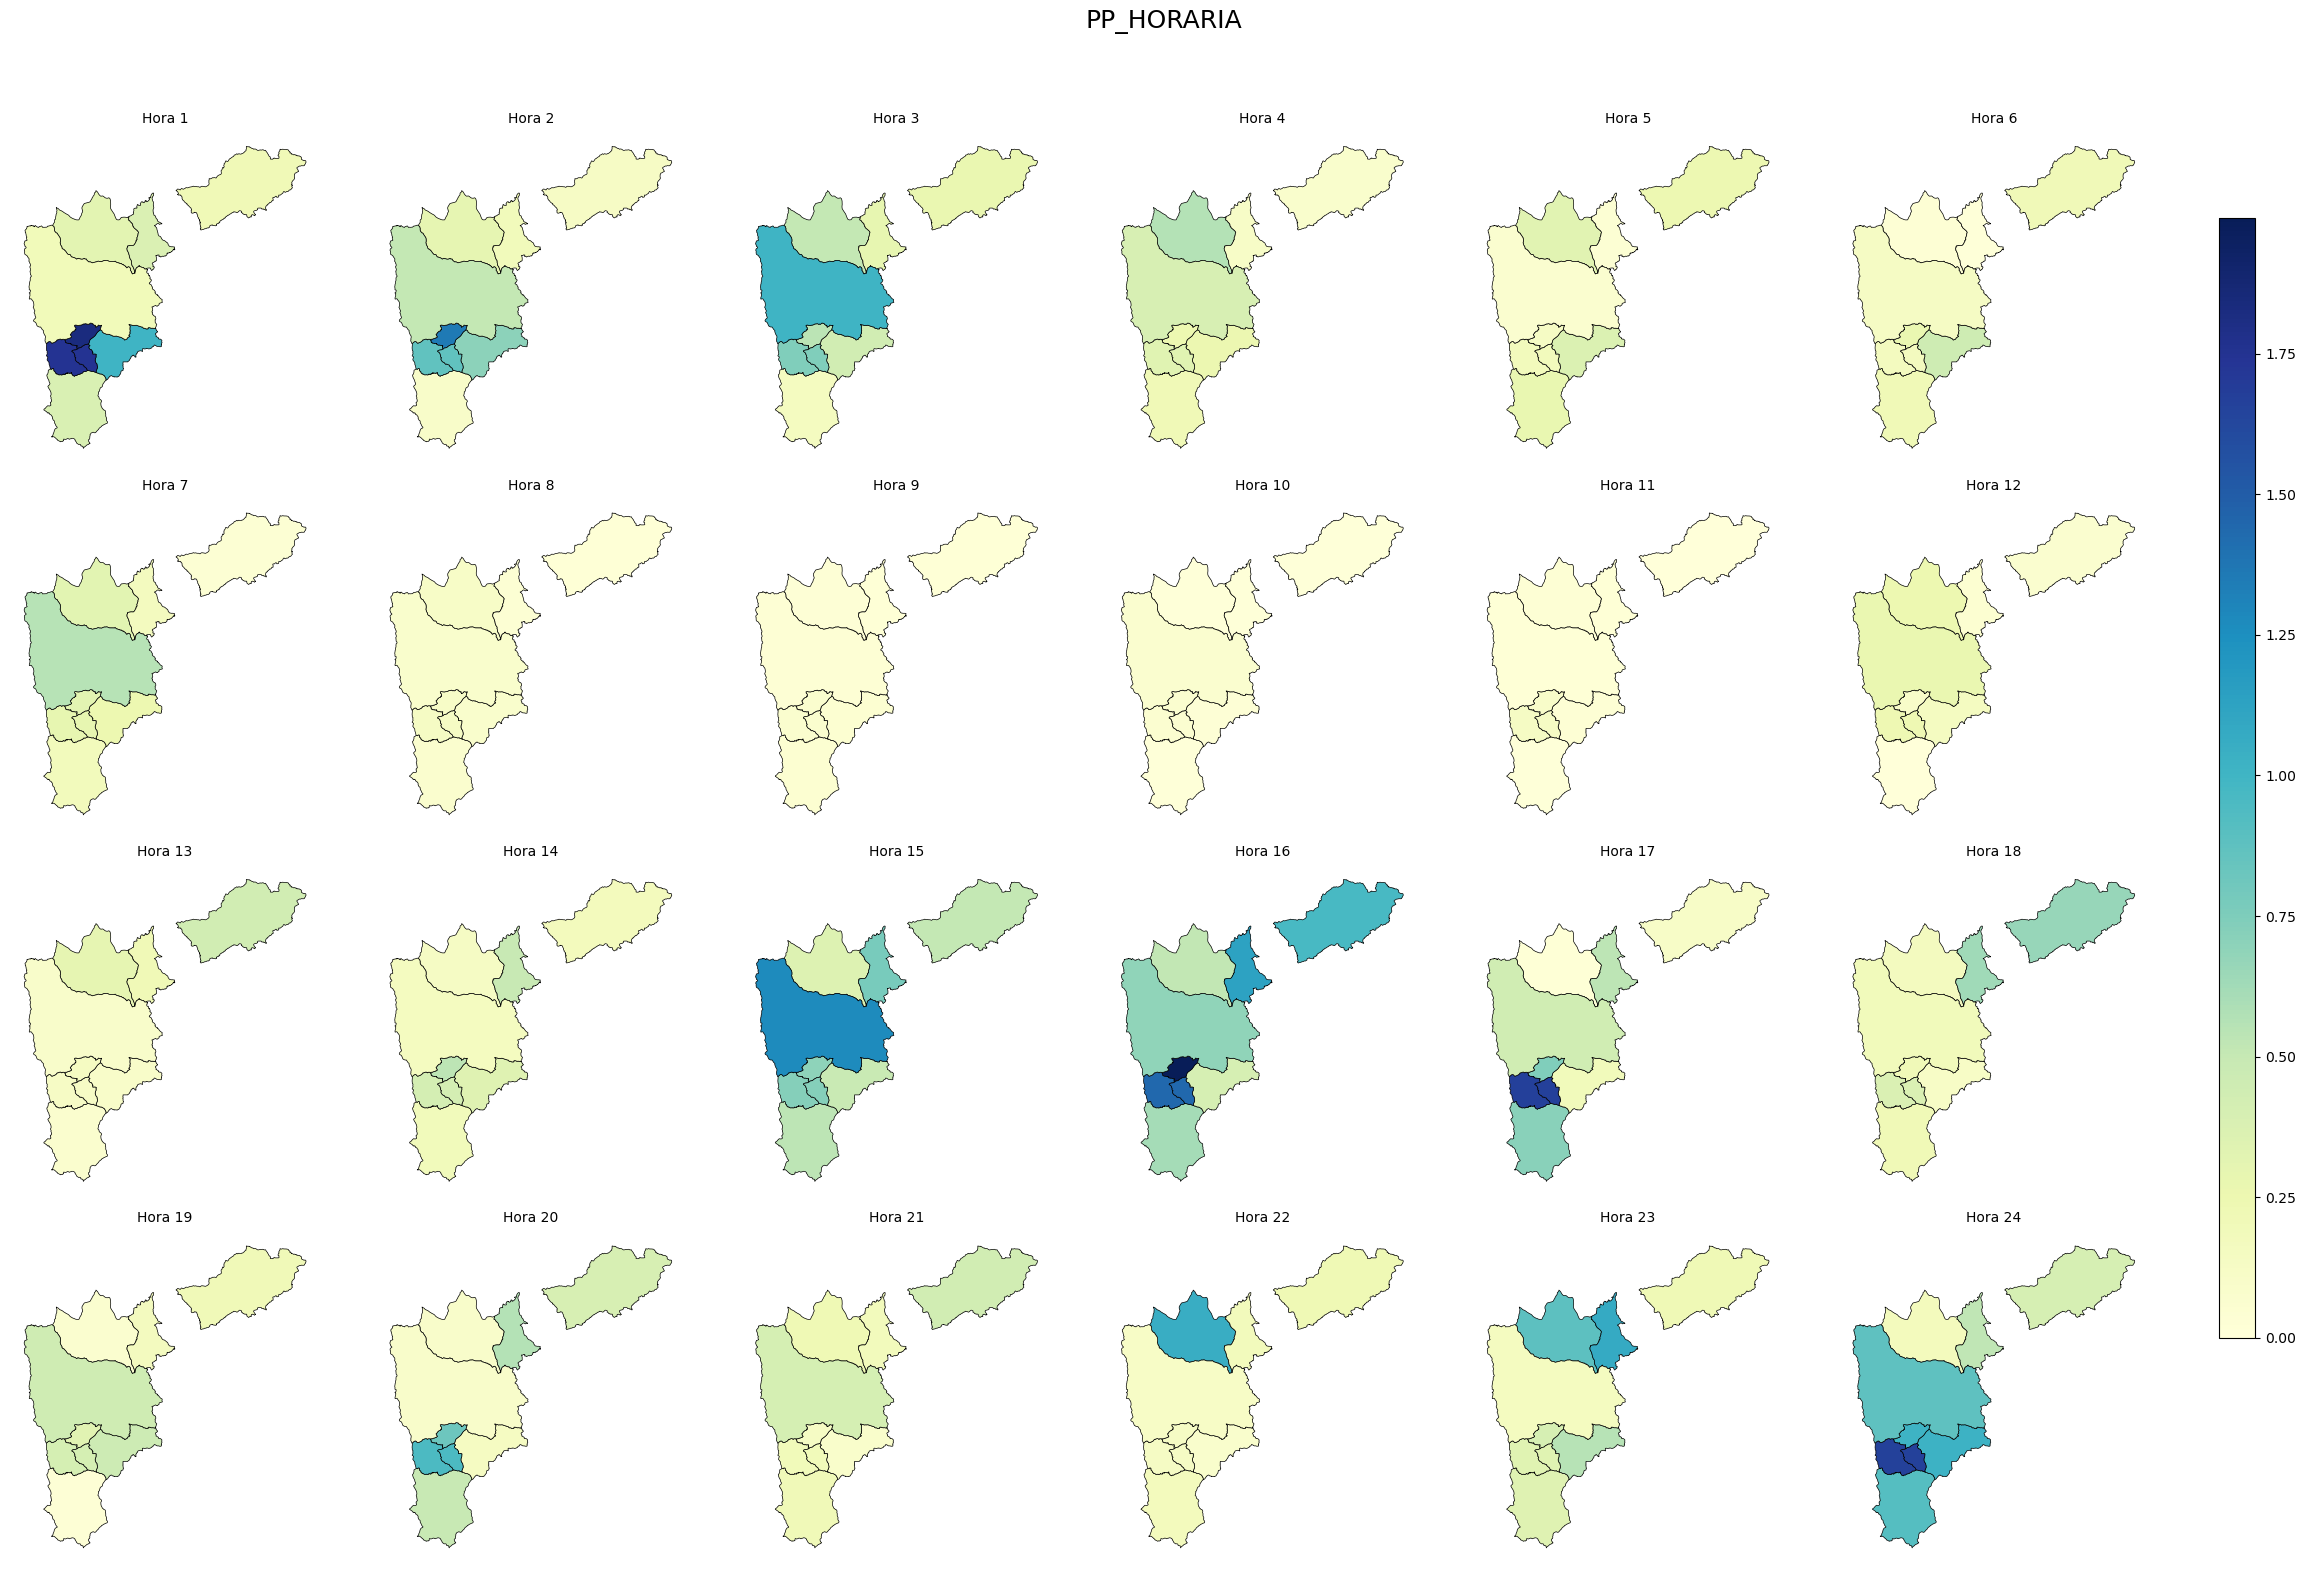

In [120]:
for var in ['pm25', 'temperatura', 'pp_horaria']:
    cmap = 'plasma' if var == 'pm25' else 'coolwarm' if var == 'temperatura' else 'YlGnBu'
    plot_24_maps_horizontal(gdf_final, var, cmap)

In [121]:
# ols
gdf_final['logpm25'] = np.log1p(gdf_final['pm25'])
gdf_final

,MPIO_NOMBR,hora,pm25,pp_horaria,temperatura,COD_MPIO,SUBREGION,ALERTA,DESCRIPCI,SymbolID,geometry,logpm25
0,barbosa,1,12.646820,0.213032,18.516828,05079,VALLE DE ABURRA,0.0,None,None,"POLYGON ((-75.32307 6.51318, -75.32329 6.51256...",2.613507
1,barbosa,2,12.615525,0.131097,18.307742,05079,VALLE DE ABURRA,0.0,None,None,"POLYGON ((-75.32307 6.51318, -75.32329 6.51256...",2.611211
2,barbosa,3,12.619358,0.270387,18.130484,05079,VALLE DE ABURRA,0.0,None,None,"POLYGON ((-75.32307 6.51318, -75.32329 6.51256...",2.611492
3,barbosa,4,12.533176,0.081935,17.948441,05079,VALLE DE ABURRA,0.0,None,None,"POLYGON ((-75.32307 6.51318, -75.32329 6.51256...",2.605144
4,barbosa,5,12.643484,0.245806,17.734570,05079,VALLE DE ABURRA,0.0,None,None,"POLYGON ((-75.32307 6.51318, -75.32329 6.51256...",2.613262
...,...,...,...,...,...,...,...,...,...,...,...,...
235,sabaneta,20,11.278385,0.950452,19.128296,05631,VALLE DE ABURRA,3.0,None,None,"POLYGON ((-75.6051 6.16322, -75.60623 6.16264,...",2.507840
236,sabaneta,21,13.100584,0.196645,18.754177,05631,VALLE DE ABURRA,3.0,None,None,"POLYGON ((-75.6051 6.16322, -75.60623 6.16264,...",2.646216
237,sabaneta,22,15.103969,0.139290,18.595957,05631,VALLE DE ABURRA,3.0,None,None,"POLYGON ((-75.6051 6.16322, -75.60623 6.16264,...",2.779066
238,sabaneta,23,16.097587,0.335935,18.425317,05631,VALLE DE ABURRA,3.0,None,None,"POLYGON ((-75.6051 6.16322, -75.60623 6.16264,...",2.838937


In [122]:
resultados = []

for h in range(1, 25):  # De 1 a 24 horas
    df_hora= gdf_final[gdf_final['hora'] == h]
    
    if len(df_hora) < 10:
        continue  

    X = gdf_final[['temperatura', 'pp_horaria']]
    X = sm.add_constant(X)
    y = gdf_final['logpm25']  

    modelo = sm.OLS(y, X).fit()
    
    resultados.append({
        'hora': h,
        'r2': modelo.rsquared,
        'beta_temp': modelo.params['temperatura'],
        'beta_pp': modelo.params['pp_horaria'],
        'p_temp': modelo.pvalues['temperatura'],
        'p_pp': modelo.pvalues['pp_horaria']
    })
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                logpm25   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.98e-05
Time:                        09:07:56   Log-Likelihood:                -8.6407
No. Observations:                 240   AIC:                             23.28
Df Residuals:                     237   BIC:                             33.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4721      0.102     24.128      